# Problem Statement

Auto insurance fraud occurs when individuals or organized groups intentionally submit false or exaggerated claims for damages, injuries, or theft involving their vehicles. This type of fraud is a significant problem for insurance companies, as it leads to increased costs and higher premiums for all policyholders. Detecting and preventing auto insurance fraud requires a combination of advanced data analytics, investigations, and fraud detection technologies.

## Dataset Description 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

## Loading Test and Train datasets

In [2]:
train_demographics = pd.read_csv('Train_Demographics.csv',na_values=['NA'])
train_claim = pd.read_csv('Train_Claim.csv',na_values=['?', '-5', 'MISSINGVALUE', 'MISSEDDATA'])
train_policy = pd.read_csv('Train_Policy.csv',na_values=['NA', '-1', 'MISSINGVAL'])
train_vehicle = pd.read_csv('train_Vehicle.csv',na_values=['???'])
train = pd.read_csv('Traindata_with_Target.csv')

In [3]:
test_demographics = pd.read_csv('Test_Demographics.csv',na_values=['NA'])
test_claim = pd.read_csv('Test_Claim.csv',na_values=['?', '-5', 'MISSINGVALUE', 'MISSEDDATA'])
test_policy = pd.read_csv('Test_Policy.csv',na_values=['NA', '-1', 'MISSINGVAL'])
test_vehicle = pd.read_csv('Test_Vehicle.csv',na_values=['???'])
test = pd.read_csv("Test.csv")

## Data Preprocessing And Visualization

### EDA for Demographics_data

#### Train data

In [4]:
#Displaying the of demographic train dataset
train_demographics

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India
...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India


In [5]:
#Checking the datatypes of train demographic dataset
train_demographics.dtypes

CustomerID               object
InsuredAge                int64
InsuredZipCode            int64
InsuredGender            object
InsuredEducationLevel    object
InsuredOccupation        object
InsuredHobbies           object
CapitalGains              int64
CapitalLoss               int64
Country                  object
dtype: object

In [6]:
#Checking the info of train demographic dataset
train_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  int64 
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


In [7]:
#Checking the null values of train demographic dataset
train_demographics.isnull().sum()

CustomerID                0
InsuredAge                0
InsuredZipCode            0
InsuredGender            30
InsuredEducationLevel     0
InsuredOccupation         0
InsuredHobbies            0
CapitalGains              0
CapitalLoss               0
Country                   2
dtype: int64

There are 30 null values in InsuredGender column and 2 in Country column.

In [8]:
#Checking the shape of train demographic dataset
train_demographics.shape

(28836, 10)

In [9]:
#Displaying the count of train demographic dataset columns - InsuredGender and Country which has missing values.
print(train_demographics['InsuredGender'].value_counts())
print(train_demographics['Country'].value_counts())

FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64
India    28834
Name: Country, dtype: int64


In [10]:
#Filling missing values in the 'InsuredGender' and 'Country' columns of a dataframe called 'train_demographics' 
#with the mode (most frequent value) of each respective column.

train_demographics['InsuredGender'].fillna(train_demographics['InsuredGender'].mode()[0], inplace=True)
train_demographics['Country'].fillna(train_demographics['Country'].mode()[0], inplace=True)

In [11]:
train_demographics.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64

All the missing values are treated.

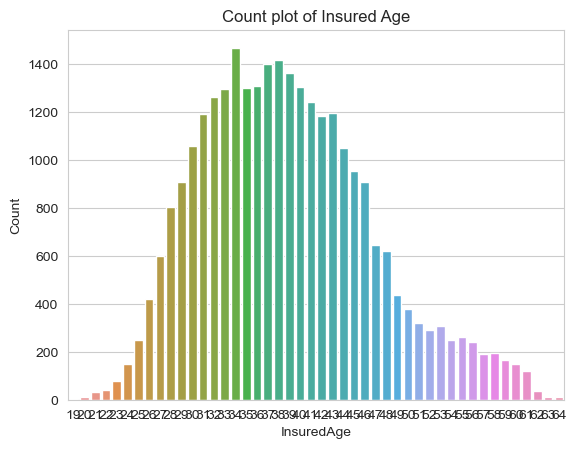

In [12]:
sns.set_style("whitegrid") # optional, to set the plot style

sns.countplot(x="InsuredAge", data=train_demographics)

plt.title("Count plot of Insured Age")
plt.xlabel("InsuredAge")
plt.ylabel("Count")

plt.show()

Most of the imsured people fall in mid age group.

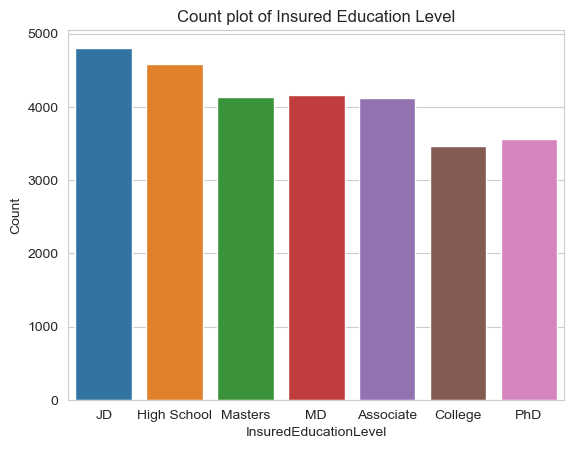

In [13]:
sns.set_style("whitegrid") # optional, to set the plot style

sns.countplot(x="InsuredEducationLevel", data=train_demographics)

plt.title("Count plot of Insured Education Level")
plt.xlabel("InsuredEducationLevel")
plt.ylabel("Count")

plt.show()

There are more count of Juris Doctor(JD) in the Insured Education level data.

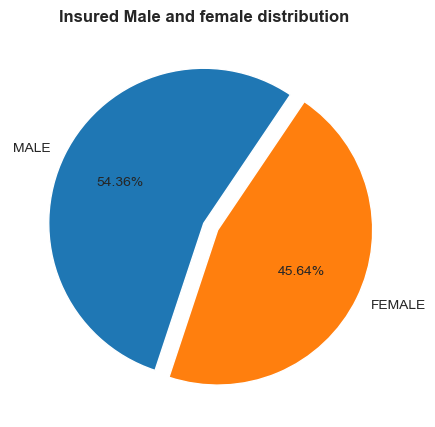

In [14]:
plt.figure(figsize=(5,7))
plt.title("Insured Male and female distribution",fontweight="bold")
values = train_demographics["InsuredGender"].value_counts()
plt.pie(values, labels=["MALE","FEMALE"], explode=(0,0.1), autopct="%.2f%%", startangle=56)
plt.show()


The female insured people are slightly less than that of male and differ by 8.72%.

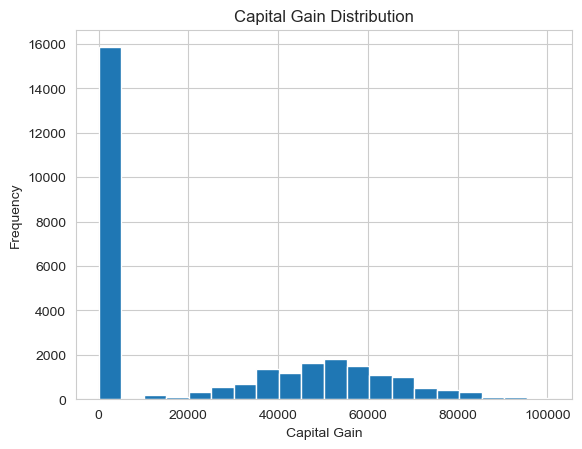

In [15]:
plt.hist(train_demographics['CapitalGains'], bins=20)
plt.title('Capital Gain Distribution')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

We can see that the most common capital gain value in this dataset is zero, as indicated by the tallest bar in the histogram. The histogram also shows that there are some with capital gain values in the range of 40,000rs to 60,000rs.And relatively few data points above rs 80,000 of gain.

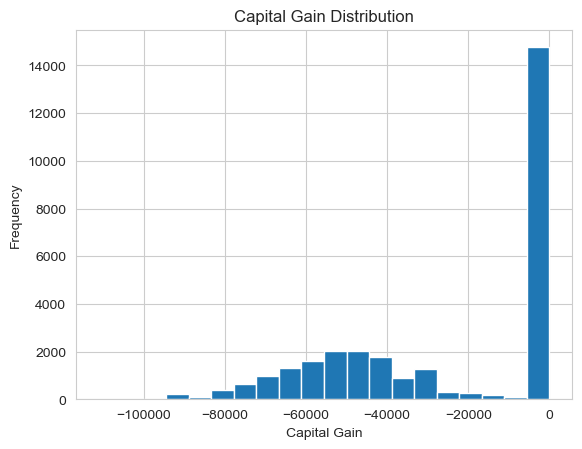

In [16]:
plt.hist(train_demographics['CapitalLoss'], bins=20)
plt.title('Capital Gain Distribution')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

We can see that the most common capital gain value in this dataset is zero, as indicated by the tallest bar in the histogram. The histogram also shows that there are some points with capital gain values in the range of 40,000rs to 60,000rs.And relatively less data points below rs 80,000 of losses.

#### Test data

In [17]:
#Displaying the of demographic test dataset
test_demographics

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India
...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,28,446435,MALE,Associate,tech-support,camping,0,-53700,India
8908,Cust9986,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India
8909,Cust9990,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India
8910,Cust9995,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India


In [18]:
#Checking the shape of test demographic dataset
test_demographics.shape

(8912, 10)

In [19]:
#Checking the null values of test demographic dataset
test_demographics.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            8
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  4
dtype: int64

In [20]:
#Checking the info of test demographic dataset
test_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             8912 non-null   object
 1   InsuredAge             8912 non-null   int64 
 2   InsuredZipCode         8912 non-null   int64 
 3   InsuredGender          8904 non-null   object
 4   InsuredEducationLevel  8912 non-null   object
 5   InsuredOccupation      8912 non-null   object
 6   InsuredHobbies         8912 non-null   object
 7   CapitalGains           8912 non-null   int64 
 8   CapitalLoss            8912 non-null   int64 
 9   Country                8908 non-null   object
dtypes: int64(4), object(6)
memory usage: 696.4+ KB


In [21]:
#fills missing values in 'InsuredGender' and 'Country' columns with the mode value of each respective column.
test_demographics['InsuredGender'].fillna(test_demographics['InsuredGender'].mode()[0], inplace=True)
test_demographics['Country'].fillna(test_demographics['Country'].mode()[0], inplace=True)


In [22]:
# Checking the null values
test_demographics.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64

### EDA for Claim_data:

#### Train data

In [23]:
#Displaying the of train claim data
train_claim

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,NaN,Trivial Damage,Police,State9,City4,Location 1890,3.0,1,NO,0,3.0,NaN,6590.0,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17.0,1,YES,0,2.0,YES,74547.0,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1.0,1,YES,2,0.0,YES,55305.0,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1.0,1,NaN,2,0.0,YES,55830.0,7059,7059,41712


In [24]:
#Checking info of train claim data
train_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             28836 non-null  object 
 1   DateOfIncident         28836 non-null  object 
 2   TypeOfIncident         28836 non-null  object 
 3   TypeOfCollission       23674 non-null  object 
 4   SeverityOfIncident     28836 non-null  object 
 5   AuthoritiesContacted   28836 non-null  object 
 6   IncidentState          28836 non-null  object 
 7   IncidentCity           28836 non-null  object 
 8   IncidentAddress        28836 non-null  object 
 9   IncidentTime           28805 non-null  float64
 10  NumberOfVehicles       28836 non-null  int64  
 11  PropertyDamage         18377 non-null  object 
 12  BodilyInjuries         28836 non-null  int64  
 13  Witnesses              28790 non-null  float64
 14  PoliceReport           19031 non-null  object 
 15  Am

In [25]:
#Checking the data tyoes of train claim data
train_claim.dtypes

CustomerID                object
DateOfIncident            object
TypeOfIncident            object
TypeOfCollission          object
SeverityOfIncident        object
AuthoritiesContacted      object
IncidentState             object
IncidentCity              object
IncidentAddress           object
IncidentTime             float64
NumberOfVehicles           int64
PropertyDamage            object
BodilyInjuries             int64
Witnesses                float64
PoliceReport              object
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
dtype: object

In [26]:
#Checking the shape of train claim data
train_claim.shape

(28836, 19)

In [27]:
#Checking null values of train claim data
train_claim.isnull().sum()

CustomerID                   0
DateOfIncident               0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentState                0
IncidentCity                 0
IncidentAddress              0
IncidentTime                31
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                   46
PoliceReport              9805
AmountOfTotalClaim          50
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
dtype: int64

Columns : TypeOfCollission, IncidentTime, PropertyDamage, Witnesses, PoliceReport, AmountOfTotalClaim has missing values.

In [28]:
print(train_claim['TypeOfCollission'].value_counts())
print(train_claim['IncidentTime'].value_counts())
print(train_claim['PropertyDamage'].value_counts())
print(train_claim['Witnesses'].value_counts())
print(train_claim['PoliceReport'].value_counts())
print(train_claim['AmountOfTotalClaim'].value_counts())

Rear Collision     8561
Side Collision     7867
Front Collision    7246
Name: TypeOfCollission, dtype: int64
16.0    1616
17.0    1615
6.0     1564
15.0    1541
14.0    1461
5.0     1434
13.0    1420
18.0    1419
4.0     1406
12.0    1363
7.0     1331
11.0    1286
19.0    1280
8.0     1251
3.0     1232
9.0     1210
10.0    1165
20.0    1153
21.0     971
22.0     809
2.0      713
1.0      648
23.0     526
0.0      391
Name: IncidentTime, dtype: int64
NO     9687
YES    8690
Name: PropertyDamage, dtype: int64
2.0    8449
1.0    8345
0.0    6128
3.0    5868
Name: Witnesses, dtype: int64
NO     9898
YES    9133
Name: PoliceReport, dtype: int64
6820.0     12
60600.0     8
5400.0      8
55000.0     7
5399.0      7
           ..
37863.0     1
33412.0     1
62879.0     1
54465.0     1
55830.0     1
Name: AmountOfTotalClaim, Length: 21975, dtype: int64


In [29]:
#Filling missing values in 'TypeOfCollission', 'PoliceReport', and 'PropertyDamage' columns  with the mode value.
mode_values = train_claim.mode().iloc[0]
train_claim['TypeOfCollission'].fillna(mode_values['TypeOfCollission'], inplace=True)
train_claim['PoliceReport'].fillna(mode_values['PoliceReport'], inplace=True)
train_claim['PropertyDamage'].fillna(mode_values['PropertyDamage'], inplace=True)

In [30]:
#Filling missing values in 'Witnesses' column with the mean value.
mean_value = train_claim['Witnesses'].mean()
train_claim['Witnesses'].fillna(mean_value, inplace=True)

In [31]:
##Filling missing values in 'AmountOfTotalClaim'and 'IncidentTime' columns  with the median value.
median_values = train_claim.median()
train_claim['AmountOfTotalClaim'].fillna(median_values['AmountOfTotalClaim'], inplace=True)
train_claim['IncidentTime'].fillna(median_values['IncidentTime'], inplace=True)


In [32]:
train_claim.isnull().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
dtype: int64

All the missing values are treated.

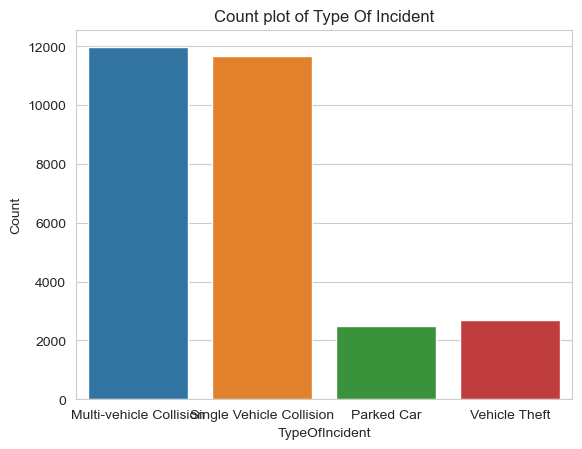

In [33]:
sns.set_style("whitegrid")

sns.countplot(x="TypeOfIncident", data=train_claim)

plt.title("Count plot of Type Of Incident")
plt.xlabel("TypeOfIncident")
plt.ylabel("Count")

plt.show()

The Multi-Vehicle and Single-Vehicle collision cases are more than Parked car and vehicle theft cases.

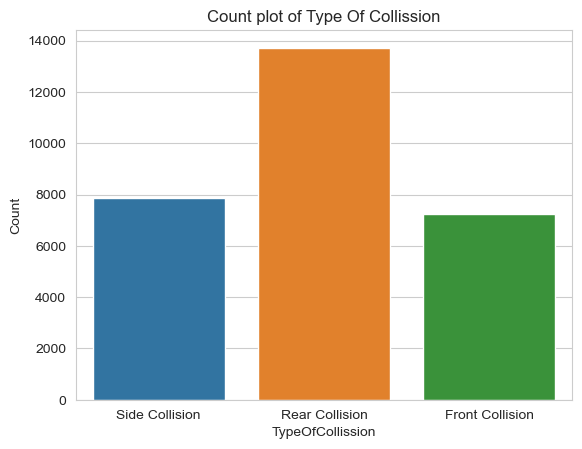

In [34]:
sns.set_style("whitegrid") 

sns.countplot(x="TypeOfCollission", data=train_claim)

plt.title("Count plot of Type Of Collission")
plt.xlabel("TypeOfCollission")
plt.ylabel("Count")

plt.show()

Rear collision type is more occuring than side and front collision type cases.

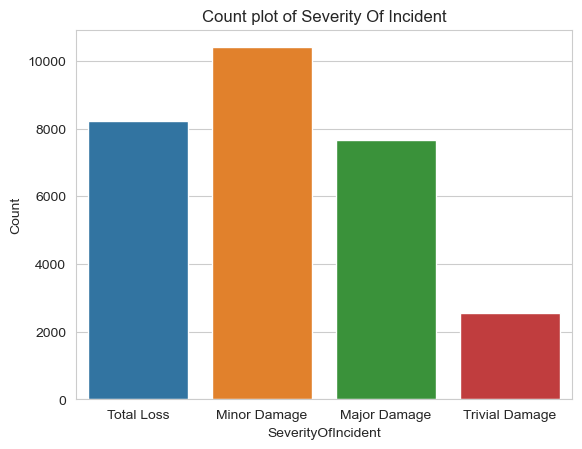

In [35]:
sns.set_style("whitegrid") 

sns.countplot(x="SeverityOfIncident", data=train_claim)

plt.title("Count plot of Severity Of Incident")
plt.xlabel("SeverityOfIncident")
plt.ylabel("Count")

plt.show()

There are more Minpr damages than Total and Major damage cases. Trivial Damage is less in count.

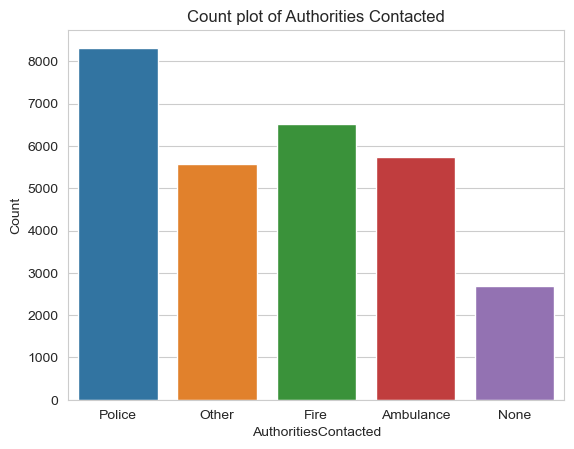

In [36]:
sns.set_style("whitegrid") 

sns.countplot(x="AuthoritiesContacted", data=train_claim)

plt.title("Count plot of Authorities Contacted")
plt.xlabel("AuthoritiesContacted")
plt.ylabel("Count")

plt.show()

There are more police involved in the insurenced case sight. Health , fire related cases are little less than police.

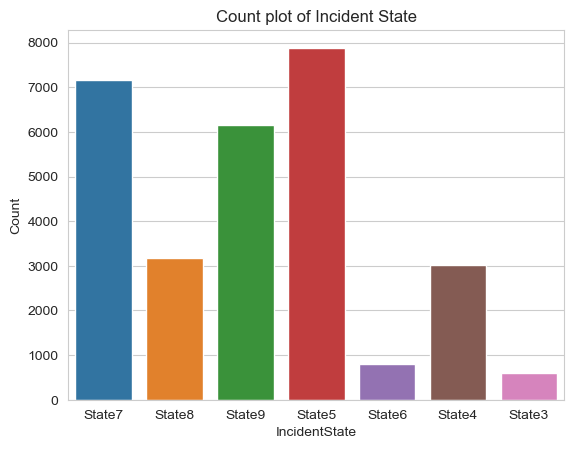

In [37]:
sns.set_style("whitegrid") 

sns.countplot(x="IncidentState", data=train_claim)

plt.title("Count plot of Incident State")
plt.xlabel("IncidentState")
plt.ylabel("Count")

plt.show()

State 5 anf state 7 has more cases

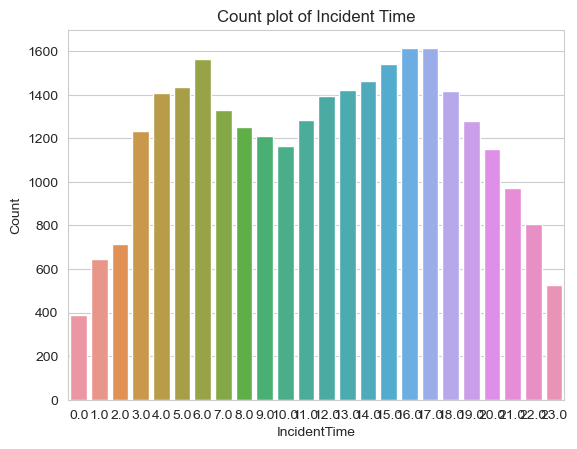

In [38]:
sns.set_style("whitegrid") 

sns.countplot(x="IncidentTime", data=train_claim)

plt.title("Count plot of Incident Time")
plt.xlabel("IncidentTime")
plt.ylabel("Count")

plt.show()

Highest number of the cases took place in early morning and late night.

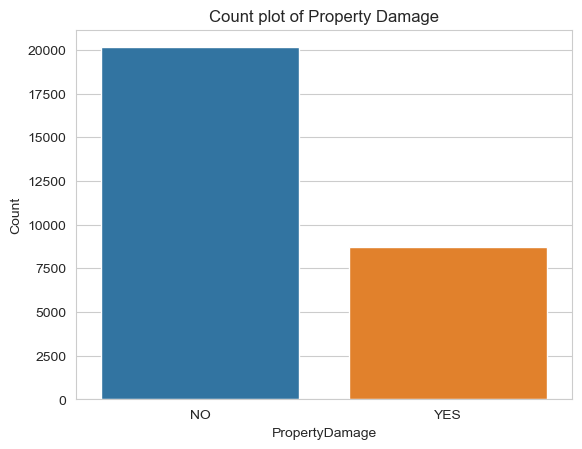

In [39]:
sns.set_style("whitegrid") 

sns.countplot(x="PropertyDamage", data=train_claim)

plt.title("Count plot of Property Damage")
plt.xlabel("PropertyDamage")
plt.ylabel("Count")

plt.show()

In most of the claims there are no Property Damage seen.

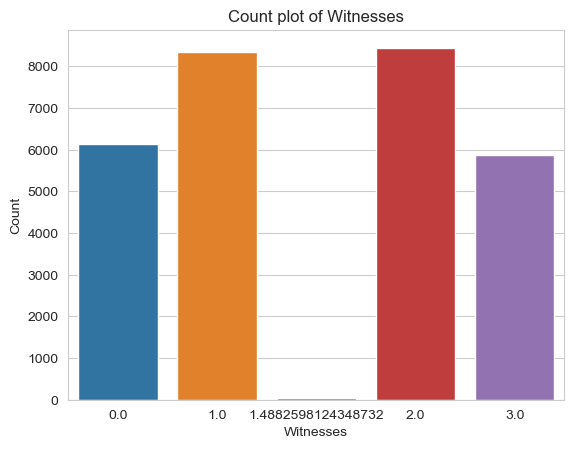

In [40]:
sns.set_style("whitegrid") 

sns.countplot(x="Witnesses", data=train_claim)

plt.title("Count plot of Witnesses")
plt.xlabel("Witnesses")
plt.ylabel("Count")

plt.show()

In the claims there are no more than 3 Witnesses.

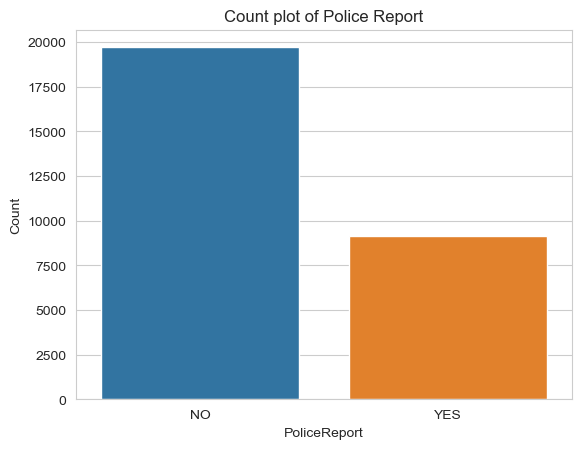

In [41]:
sns.set_style("whitegrid") 

sns.countplot(x="PoliceReport", data=train_claim)

plt.title("Count plot of Police Report")
plt.xlabel("PoliceReport")
plt.ylabel("Count")

plt.show()

In most of the claims the police report is not filed. There is a chance of fraud or we can consider it as illiteracy.

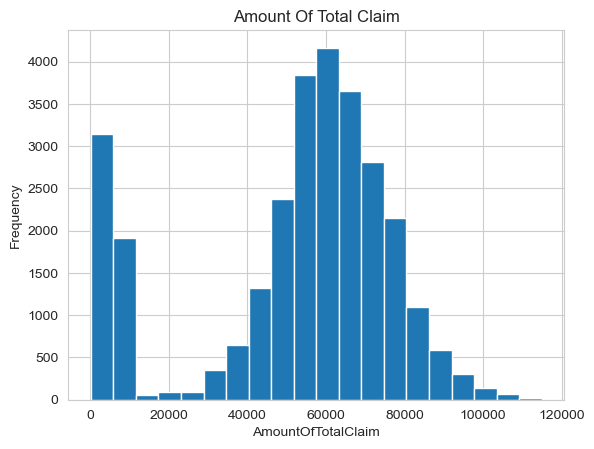

In [42]:
plt.hist(train_claim['AmountOfTotalClaim'], bins=20)
plt.title('Amount Of Total Claim')
plt.xlabel('AmountOfTotalClaim')
plt.ylabel('Frequency')
plt.show()

Total claims fall in the range of 0-120000 rs, with a peak at around 4000-8000 dollars.And least claims above 100000 rs.

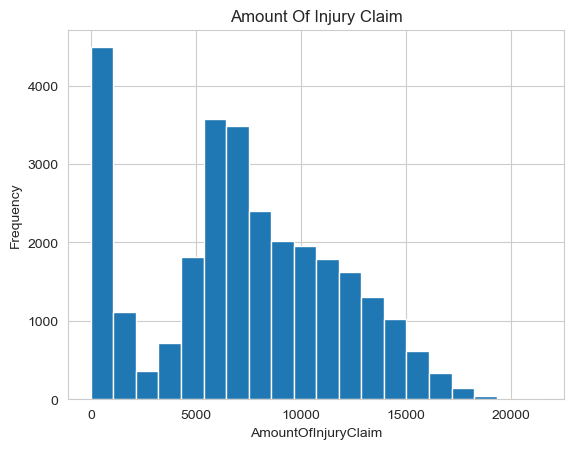

In [43]:
plt.hist(train_claim['AmountOfInjuryClaim'], bins=20)
plt.title('Amount Of Injury Claim')
plt.xlabel('AmountOfInjuryClaim')
plt.ylabel('Frequency')
plt.show()

Injury claims fall in the range of 0-20000 rs, with a peak at around 5000-10000 dollars.And least claims above 15000 rs.

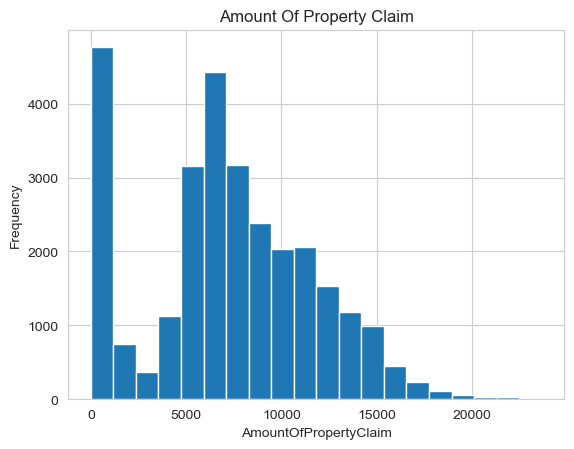

In [44]:
plt.hist(train_claim['AmountOfPropertyClaim'], bins=20)
plt.title('Amount Of Property Claim')
plt.xlabel('AmountOfPropertyClaim')
plt.ylabel('Frequency')
plt.show()

Property claims fall in the range of 0-20000, with a peak at around 5000-10000 dollars.And least claims above 15000 rs.

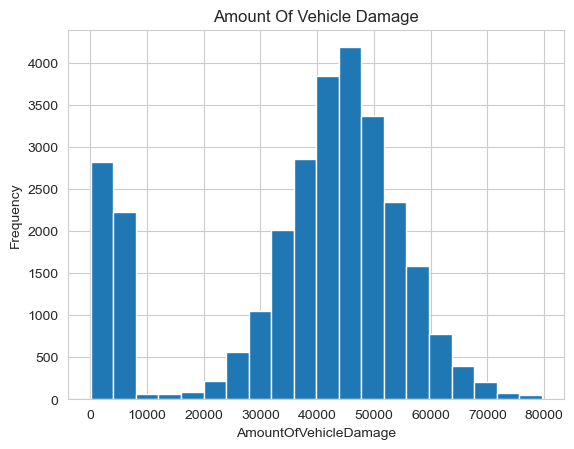

In [45]:
plt.hist(train_claim['AmountOfVehicleDamage'], bins=20)
plt.title('Amount Of Vehicle Damage')
plt.xlabel('AmountOfVehicleDamage')
plt.ylabel('Frequency')
plt.show()

Vehicle damage claims fall in the range of 0-80000, with a peak at around 40000-60000 dollars.And least claims above 60000 rs.

#### Test data

In [46]:
#Displaying test claim data.
test_claim

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,NO,0,0.0,NaN,68354.0,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,NaN,1,1.0,NaN,55270.0,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,NO,0,1.0,NaN,59515.0,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,1,NaN,2,1.0,NaN,4941.0,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,2015-01-17,Single Vehicle Collision,Rear Collision,Total Loss,Police,State5,City4,Location 1958,10.0,1,YES,1,0.0,NO,61296.0,5785,8861,46650
8908,Cust9986,2015-02-09,Single Vehicle Collision,Front Collision,Total Loss,Other,State5,City2,Location 1035,19.0,1,NaN,1,1.0,YES,86729.0,9698,9698,67333
8909,Cust9990,2015-02-20,Single Vehicle Collision,Rear Collision,Minor Damage,Other,State5,City2,Location 2037,9.0,1,YES,1,2.0,NO,65328.0,12455,9281,43592
8910,Cust9995,2015-02-22,Single Vehicle Collision,Side Collision,Minor Damage,Police,State8,City3,Location 2097,19.0,1,YES,0,2.0,YES,71118.0,11977,11604,47537


In [47]:
#Checking info of test claim data
test_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             8912 non-null   object 
 1   DateOfIncident         8912 non-null   object 
 2   TypeOfIncident         8912 non-null   object 
 3   TypeOfCollission       7149 non-null   object 
 4   SeverityOfIncident     8912 non-null   object 
 5   AuthoritiesContacted   8912 non-null   object 
 6   IncidentState          8912 non-null   object 
 7   IncidentCity           8912 non-null   object 
 8   IncidentAddress        8912 non-null   object 
 9   IncidentTime           8905 non-null   float64
 10  NumberOfVehicles       8912 non-null   int64  
 11  PropertyDamage         5713 non-null   object 
 12  BodilyInjuries         8912 non-null   int64  
 13  Witnesses              8900 non-null   float64
 14  PoliceReport           5898 non-null   object 
 15  Amou

In [48]:
#Checking shape of test claim data
test_claim.shape

(8912, 19)

In [49]:
#Checking null values of test claim data
test_claim.isnull().sum()

CustomerID                  0
DateOfIncident              0
TypeOfIncident              0
TypeOfCollission         1763
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
IncidentAddress             0
IncidentTime                7
NumberOfVehicles            0
PropertyDamage           3199
BodilyInjuries              0
Witnesses                  12
PoliceReport             3014
AmountOfTotalClaim          8
AmountOfInjuryClaim         0
AmountOfPropertyClaim       0
AmountOfVehicleDamage       0
dtype: int64

Columns: TypeOfCollission, PropertyDamage, Witnesses and PoliceReport has missing values

In [50]:
#Filling missing values in 'TypeOfCollission', 'PoliceReport', and 'PropertyDamage' columns  with the mode value.
mode_values = train_claim.mode().iloc[0]
test_claim['TypeOfCollission'].fillna(mode_values['TypeOfCollission'], inplace=True)
test_claim['PoliceReport'].fillna(mode_values['PoliceReport'], inplace=True)
test_claim['PropertyDamage'].fillna(mode_values['PropertyDamage'], inplace=True)

In [51]:
#Filling missing values in 'Witnesses' column with the mean value.
mean_value = train_claim['Witnesses'].mean()
test_claim['Witnesses'].fillna(mean_value, inplace=True)

In [52]:
#Filling missing values in 'AmountOfTotalClaim'and 'IncidentTime' columns  with the median value.
median_values = train_claim.median()
test_claim['AmountOfTotalClaim'].fillna(median_values['AmountOfTotalClaim'], inplace=True)
test_claim['IncidentTime'].fillna(median_values['IncidentTime'], inplace=True)

In [53]:
test_claim.isnull().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
dtype: int64

All the null values are treated.

### EDA of Policy_data:

#### Train data

In [54]:
#Displaying policy data
train_policy

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007
...,...,...,...,...,...,...,...,...,...,...
28831,148614,425,1999-10-12,State3,250/500,1000,839.81,0,wife,Cust39493
28832,148615,367,1996-11-09,State3,250/500,1000,811.03,0,husband,Cust39494
28833,148616,208,1995-12-04,State3,250/500,1000,891.37,0,husband,Cust39495
28834,148618,401,1994-09-12,State3,250/500,856,911.37,0,own-child,Cust39497


In [55]:
#Checking info of train policy data
train_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   DateOfPolicyCoverage        28836 non-null  object 
 3   InsurancePolicyState        28836 non-null  object 
 4   Policy_CombinedSingleLimit  28836 non-null  object 
 5   Policy_Deductible           28836 non-null  int64  
 6   PolicyAnnualPremium         28695 non-null  float64
 7   UmbrellaLimit               28836 non-null  int64  
 8   InsuredRelationship         28836 non-null  object 
 9   CustomerID                  28836 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


In [56]:
#Checking datatype of train policy data
train_policy.dtypes

InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
DateOfPolicyCoverage           object
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
CustomerID                     object
dtype: object

In [57]:
#Checking shape of train policy data
train_policy.shape

(28836, 10)

In [58]:
##Checking null values of train policy data
train_policy.isnull().sum()

InsurancePolicyNumber           0
CustomerLoyaltyPeriod           0
DateOfPolicyCoverage            0
InsurancePolicyState            0
Policy_CombinedSingleLimit      0
Policy_Deductible               0
PolicyAnnualPremium           141
UmbrellaLimit                   0
InsuredRelationship             0
CustomerID                      0
dtype: int64

The column PolicyAnnualPremium  has 141 missing values.

In [59]:
print(train_policy['PolicyAnnualPremium'].value_counts())

1310.77    7
1310.78    6
1226.29    5
1285.77    5
1265.59    5
          ..
1131.23    1
1446.95    1
1184.71    1
1052.28    1
1062.91    1
Name: PolicyAnnualPremium, Length: 23851, dtype: int64


In [60]:
#Filling missing values in 'PolicyAnnualPremium' column with the mean value.
mean_value = train_policy['PolicyAnnualPremium'].mean()
train_policy['PolicyAnnualPremium'].fillna(mean_value, inplace=True)

In [61]:
train_policy.isnull().sum()

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
dtype: int64

All the missing values are treated.

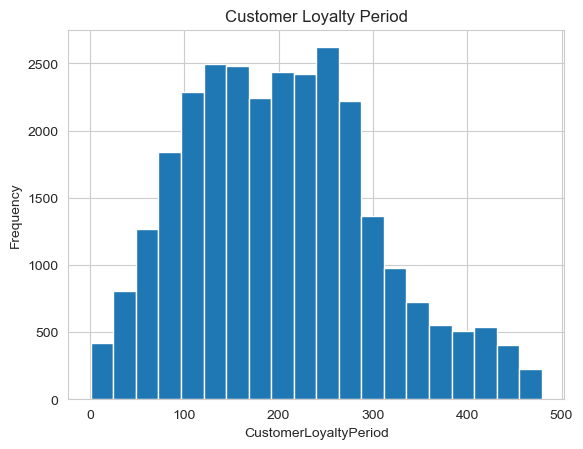

In [62]:
plt.hist(train_policy['CustomerLoyaltyPeriod'], bins=20)
plt.title('Customer Loyalty Period')
plt.xlabel('CustomerLoyaltyPeriod')
plt.ylabel('Frequency')
plt.show()

Histogram is skewed to the right (i.e., it has a longer tail on the right side), it means that there are some very loyal customers who have been with the company for a long time.

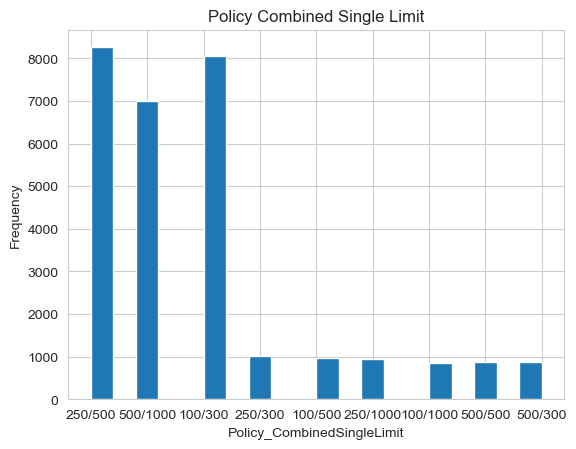

In [63]:
plt.hist(train_policy['Policy_CombinedSingleLimit'], bins=20)
plt.title('Policy Combined Single Limit')
plt.xlabel('Policy_CombinedSingleLimit')
plt.ylabel('Frequency')
plt.show()

The histogram is skewed to the right, it means that there are some policies with very high limits. 

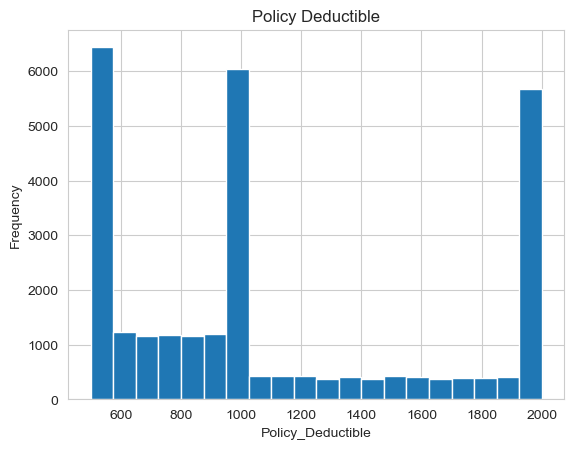

In [64]:
plt.hist(train_policy['Policy_Deductible'], bins=20)
plt.title('Policy Deductible')
plt.xlabel('Policy_Deductible')
plt.ylabel('Frequency')
plt.show()

Distribution of deductible amounts is unevenly spread.

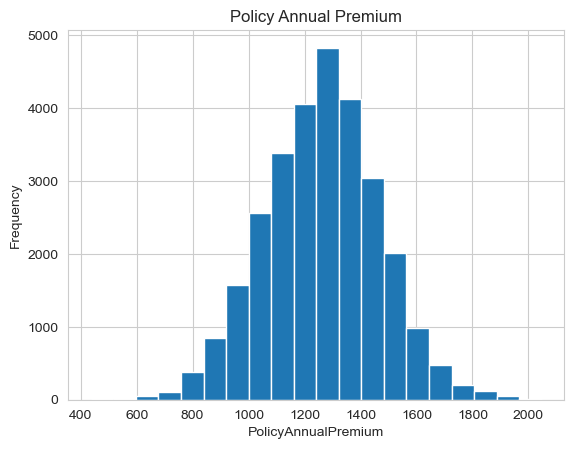

In [65]:
plt.hist(train_policy['PolicyAnnualPremium'], bins=20)
plt.title('Policy Annual Premium')
plt.xlabel('PolicyAnnualPremium')
plt.ylabel('Frequency')
plt.show()

The distribution of annual premium amounts is evenly spread across the range of values.

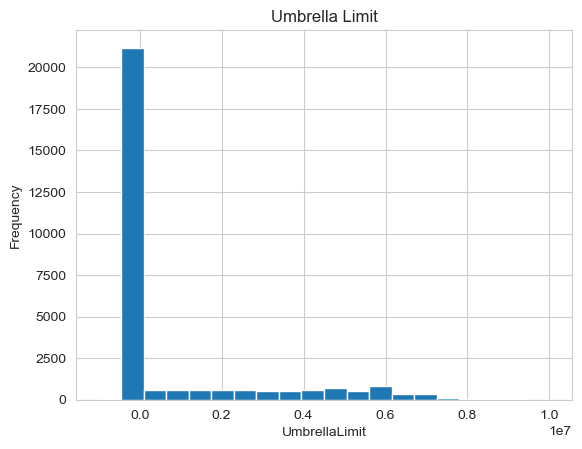

In [66]:
plt.hist(train_policy['UmbrellaLimit'], bins=20)
plt.title('Umbrella Limit')
plt.xlabel('UmbrellaLimit')
plt.ylabel('Frequency')
plt.show()

There are very less claims who has been provided with additional coverage beyond the limits of an insured's primary policy.

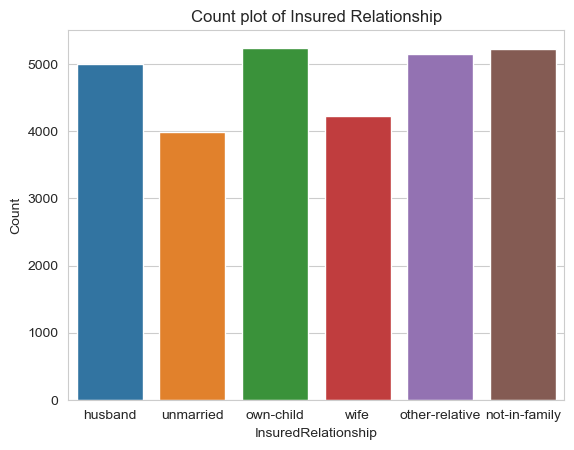

In [67]:
sns.set_style("whitegrid") # optional, to set the plot style

sns.countplot(x="InsuredRelationship", data=train_policy)

plt.title("Count plot of Insured Relationship")
plt.xlabel("InsuredRelationship")
plt.ylabel("Count")

plt.show()

All the claims are almost equally distributed of relationship. But there are slightly more for those who own child.

#### Test data

In [68]:
#Displaying test policy data
test_policy

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020
...,...,...,...,...,...,...,...,...,...,...
8907,148598,155,2000-03-19,State3,250/500,616,1358.80,3462442,other-relative,Cust39477
8908,148599,215,1993-07-23,State3,250/500,892,1299.82,4567362,other-relative,Cust39478
8909,148609,245,2009-12-11,State1,500/1000,1002,1361.44,9580,wife,Cust39488
8910,148610,437,2011-11-17,State1,500/1000,1902,1357.36,4510498,wife,Cust39489


In [69]:
#Checking info of test policy data
test_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       8912 non-null   int64  
 1   CustomerLoyaltyPeriod       8912 non-null   int64  
 2   DateOfPolicyCoverage        8912 non-null   object 
 3   InsurancePolicyState        8912 non-null   object 
 4   Policy_CombinedSingleLimit  8912 non-null   object 
 5   Policy_Deductible           8912 non-null   int64  
 6   PolicyAnnualPremium         8865 non-null   float64
 7   UmbrellaLimit               8912 non-null   int64  
 8   InsuredRelationship         8912 non-null   object 
 9   CustomerID                  8912 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 696.4+ KB


In [70]:
#Checking shape of train policy data
test_policy.shape

(8912, 10)

In [71]:
#Checking null values of test policy data
test_policy.isnull().sum()

InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
DateOfPolicyCoverage           0
InsurancePolicyState           0
Policy_CombinedSingleLimit     0
Policy_Deductible              0
PolicyAnnualPremium           47
UmbrellaLimit                  0
InsuredRelationship            0
CustomerID                     0
dtype: int64

In [72]:
#Filling missing values in 'PolicyAnnualPremium' column with the mean value.
mean_value = test_policy['PolicyAnnualPremium'].mean()
test_policy['PolicyAnnualPremium'].fillna(mean_value, inplace=True)

In [73]:
test_policy.isnull().sum()

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
dtype: int64

All the missing values are treated.

### EDA of Vehicle_data:

#### Train data

In [74]:
#Displaying the train vehicle data
train_vehicle

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
...,...,...,...
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680


In [75]:
#Checking info of train vehicle data
train_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115344 entries, 0 to 115343
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CustomerID               115344 non-null  object
 1   VehicleAttribute         115344 non-null  object
 2   VehicleAttributeDetails  115294 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [76]:
#Creating dataframe where each unique value of 'VehicleAttribute' has its own column
train_vehicle = train_vehicle.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [77]:
#Checking shape of train vehicle data
train_vehicle.shape

(28836, 4)

In [78]:
train_vehicle.columns = train_vehicle.columns.droplevel(0) 
train_vehicle.columns.name = None               
train_vehicle = train_vehicle.reset_index()

In [79]:
#Displaying the train vehicle data
train_vehicle

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...
28831,Cust9993,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,Vehicle10240,Suburu,Forrestor,2004


In [80]:
##Checking datatyoe of train vehicle data
train_vehicle.dtypes

CustomerID      object
VehicleID       object
VehicleMake     object
VehicleModel    object
VehicleYOM      object
dtype: object

In [81]:
##Checking null values of train vehicle data
train_vehicle.isnull().sum()

CustomerID       0
VehicleID        0
VehicleMake     50
VehicleModel     0
VehicleYOM       0
dtype: int64

VehicleMake has 50 missing values.

In [82]:
#Filling missing values in 'VehicleMake' column with the mode value.
mode_values = train_vehicle.mode().iloc[0]
train_vehicle['VehicleMake'].fillna(mode_values['VehicleMake'], inplace=True)

In [83]:
train_vehicle.isnull().sum()

CustomerID      0
VehicleID       0
VehicleMake     0
VehicleModel    0
VehicleYOM      0
dtype: int64

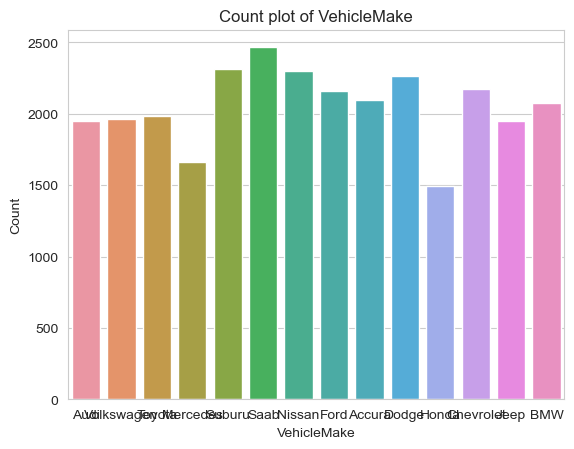

In [84]:
sns.set_style("whitegrid") 

sns.countplot(x="VehicleMake", data=train_vehicle)

plt.title("Count plot of VehicleMake")
plt.xlabel("VehicleMake")
plt.ylabel("Count")

plt.show()

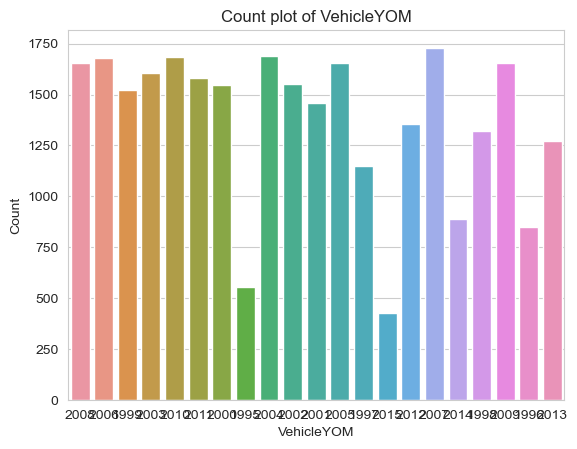

In [85]:
sns.set_style("whitegrid") 

sns.countplot(x="VehicleYOM", data=train_vehicle)

plt.title("Count plot of VehicleYOM")
plt.xlabel("VehicleYOM")
plt.ylabel("Count")

plt.show()

There are more old model vehicles which has insurance claims comparitively with that of new model vehicles.

#### Test data

In [86]:
#Displaying test vehicle data
test_vehicle

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry
...,...,...,...
35643,Cust1980,VehicleModel,95
35644,Cust17773,VehicleModel,Silverado
35645,Cust24313,VehicleID,Vehicle33407
35646,Cust5061,VehicleYOM,2003


In [87]:
#Creating dataframe where each unique value of 'VehicleAttribute' has its own column
test_vehicle = test_vehicle.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [88]:
test_vehicle.columns = test_vehicle.columns.droplevel(0) 
test_vehicle.columns.name = None               
test_vehicle = test_vehicle.reset_index()

In [89]:
test_vehicle

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,Vehicle37114,Accura,TL,2009
4,Cust1003,Vehicle16771,Dodge,RAM,2007
...,...,...,...,...,...
8907,Cust9984,Vehicle19062,Saab,95,2000
8908,Cust9986,Vehicle18191,Saab,92x,2000
8909,Cust9990,Vehicle11032,BMW,Civic,1998
8910,Cust9995,Vehicle30412,Jeep,Grand Cherokee,2002


In [90]:
#Checking shape of test vehicle data
test_vehicle.shape

(8912, 5)

In [91]:
#Checking null values of test vehicle data
test_vehicle.isnull().sum()

CustomerID      0
VehicleID       0
VehicleMake     8
VehicleModel    0
VehicleYOM      0
dtype: int64

In [92]:
#Filling missing values in 'VehicleMake' column with the mode value.
mode_values = test_vehicle.mode().iloc[0]
test_vehicle['VehicleMake'].fillna(mode_values['VehicleMake'], inplace=True)

In [93]:
test_vehicle.isnull().sum()

CustomerID      0
VehicleID       0
VehicleMake     0
VehicleModel    0
VehicleYOM      0
dtype: int64

### EDA of Train data:

In [94]:
#Displaying train data
train

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [95]:
#Checking info of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     28836 non-null  object
 1   ReportedFraud  28836 non-null  object
dtypes: object(2)
memory usage: 450.7+ KB


In [96]:
#Checking datatypes of train data
train.dtypes

CustomerID       object
ReportedFraud    object
dtype: object

In [97]:
#Checking shape of train data
train.shape

(28836, 2)

In [98]:
#Checking null values of train data
train.isnull().sum()

CustomerID       0
ReportedFraud    0
dtype: int64

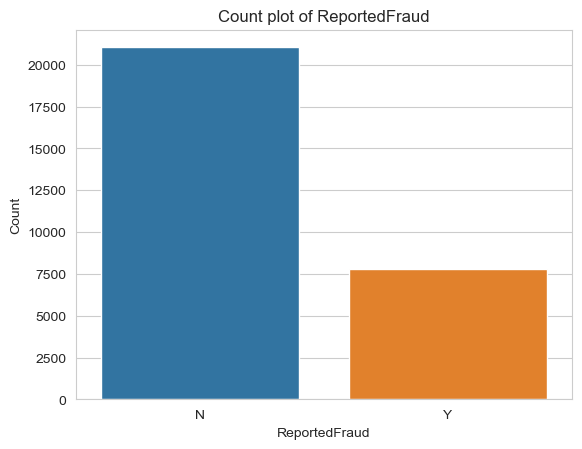

In [99]:
sns.set_style("whitegrid") 

sns.countplot(x="ReportedFraud", data=train)

plt.title("Count plot of ReportedFraud")
plt.xlabel("ReportedFraud")
plt.ylabel("Count")

plt.show()

There are more claims which are reported as Not Fraud.

#### Test data

In [100]:
#Displaying test data
test

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003
...,...
8907,Cust37942
8908,Cust20528
8909,Cust36797
8910,Cust28499


In [101]:
#Checking info of test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  8912 non-null   object
dtypes: object(1)
memory usage: 69.8+ KB


In [102]:
#Checking null values of test data
test.isnull().sum()

CustomerID    0
dtype: int64

In [103]:
#Checking shape of test data
test.shape

(8912, 1)

## Merging the dataset

### Train data

In [104]:
train_data = pd.merge(train_demographics, train_claim, on='CustomerID', how="outer")
train_data = pd.merge(train_data, train_policy, on='CustomerID', how="outer")
train_data = pd.merge(train_data, train_vehicle, on='CustomerID', how="outer")
train_data = pd.merge(train_data, train, on='CustomerID', how="outer")

In [105]:
#Save the new train data as train_data.csv
train_data.to_csv('train_data.csv', index=False)

In [106]:
train_data = pd.read_csv('train_data.csv')

In [107]:
#Displaying first five rows
train_data.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N


In [108]:
#Displaying last five rows
train_data.tail()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India,...,500/1000,655,1276.01,0,unmarried,Vehicle13568,Suburu,Impreza,2007,N
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India,...,100/300,1089,1273.38,0,unmarried,Vehicle19810,Jeep,Wrangler,2003,N
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India,...,250/500,787,1380.92,3448735,own-child,Vehicle3339,Suburu,Legacy,2004,N
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India,...,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Suburu,Forrestor,2004,N
28835,Cust9999,36,450730,FEMALE,PhD,handlers-cleaners,base-jumping,46400,-74300,India,...,500/1000,2000,928.43,2909175,husband,Vehicle39163,Suburu,E400,2007,N


In [109]:
#Checking info of merged train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   InsuredAge                  28836 non-null  int64  
 2   InsuredZipCode              28836 non-null  int64  
 3   InsuredGender               28836 non-null  object 
 4   InsuredEducationLevel       28836 non-null  object 
 5   InsuredOccupation           28836 non-null  object 
 6   InsuredHobbies              28836 non-null  object 
 7   CapitalGains                28836 non-null  int64  
 8   CapitalLoss                 28836 non-null  int64  
 9   Country                     28836 non-null  object 
 10  DateOfIncident              28836 non-null  object 
 11  TypeOfIncident              28836 non-null  object 
 12  TypeOfCollission            28836 non-null  object 
 13  SeverityOfIncident          288

In [110]:
#Checking datatypes of merged train data
train_data.dtypes

CustomerID                     object
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
Country                        object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfProp

Conversion of categorical to numerical value is needed.

In [111]:
#Checking shape of merged train data
train_data.shape

(28836, 42)

In [112]:
#Checking null values of merged train data
train_data.isnull().sum()

CustomerID                    0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

There are no null values.

In [113]:
#Checking descriptive statistics of merged train data
train_data.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.00000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04,28836.000000
mean,38.815370,502436.579068,23066.569566,-24940.612429,11.764322,1.823207,0.985782,1.48826,52319.038355,7337.118428,7283.870197,37687.129387,129312.517097,203.067867,1114.282529,1261.702646,9.836680e+05,2005.093113
std,7.996377,72250.868871,27637.813724,27913.209608,6.145568,0.980099,0.784764,1.03996,25080.664083,4427.638593,4375.842738,17977.048232,11114.060267,99.932951,546.632816,204.882387,1.969282e+06,5.309956
min,19.000000,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.00000,150.000000,0.000000,0.000000,109.000000,110122.000000,1.000000,500.000000,436.280000,-1.000000e+06,1995.000000
25%,33.000000,448603.000000,0.000000,-50000.000000,6.000000,1.000000,0.000000,1.00000,44686.250000,4743.750000,4862.000000,32193.250000,119698.750000,126.000000,622.000000,1125.247500,0.000000e+00,2001.000000
50%,38.000000,466691.000000,0.000000,0.000000,12.000000,1.000000,1.000000,1.00000,58360.000000,7147.000000,7051.000000,42457.500000,129278.500000,199.000000,1000.000000,1265.205000,0.000000e+00,2005.000000
75%,44.000000,603848.000000,49000.000000,0.000000,17.000000,3.000000,2.000000,2.00000,68961.750000,10571.250000,10327.000000,49535.750000,138933.250000,267.000000,1627.000000,1396.605000,4.859610e+05,2010.000000
max,64.000000,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.00000,114920.000000,21450.000000,23670.000000,79560.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,2015.000000


<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

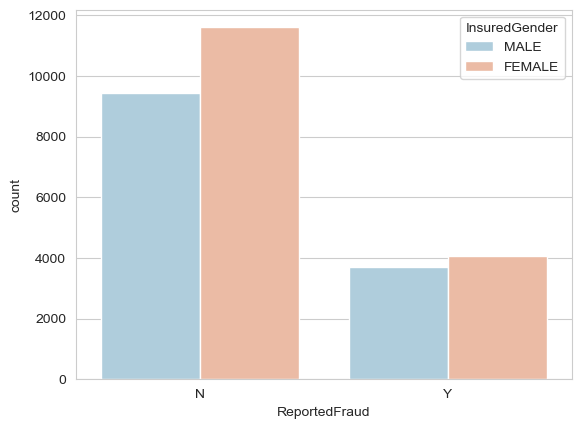

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='InsuredGender',data=train_data,palette='RdBu_r')

There are more claims by female who is claimed as fraud.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

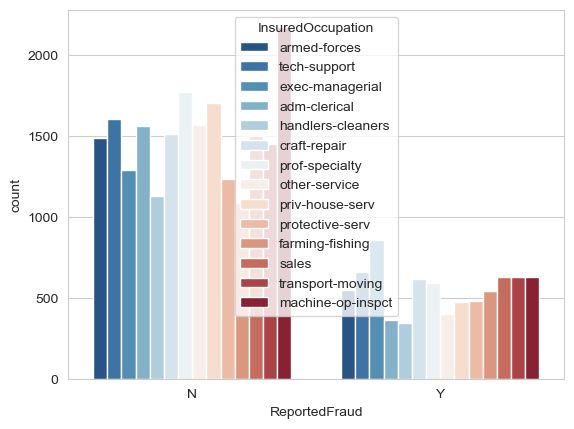

In [115]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='InsuredOccupation',data=train_data,palette='RdBu_r')

The people with Exec-Managerial occupation have more involvment in fraud claims.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

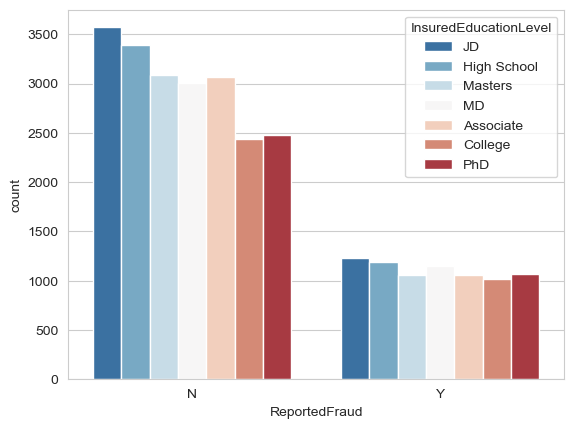

In [116]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='InsuredEducationLevel',data=train_data,palette='RdBu_r')

The people with JD educational level have more involvment in fraud claims.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

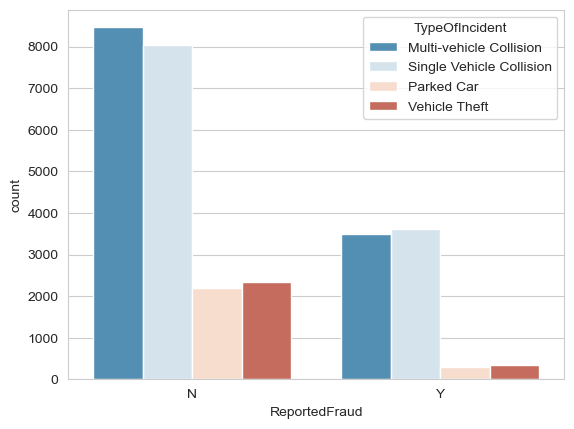

In [117]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='TypeOfIncident',data=train_data,palette='RdBu_r')

The single Vehicle collision cases are related with fraudulent insurance claims.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

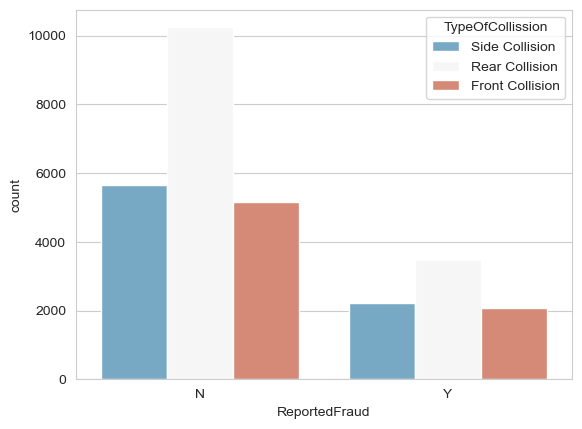

In [118]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='TypeOfCollission',data=train_data,palette='RdBu_r')

The rear collision cases are related with fraudulent insurance claims.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

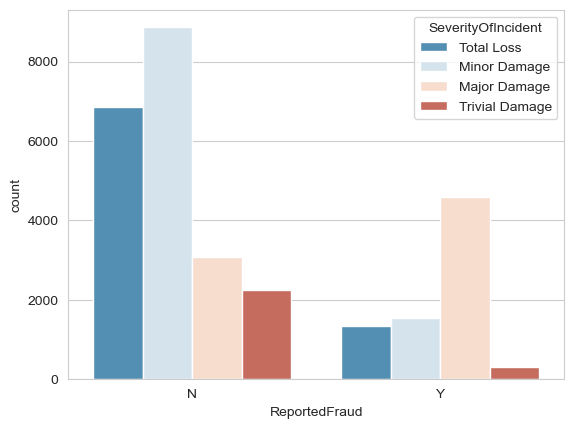

In [119]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='SeverityOfIncident',data=train_data,palette='RdBu_r')

The major damage cases are related with fraudulent insurance claims.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

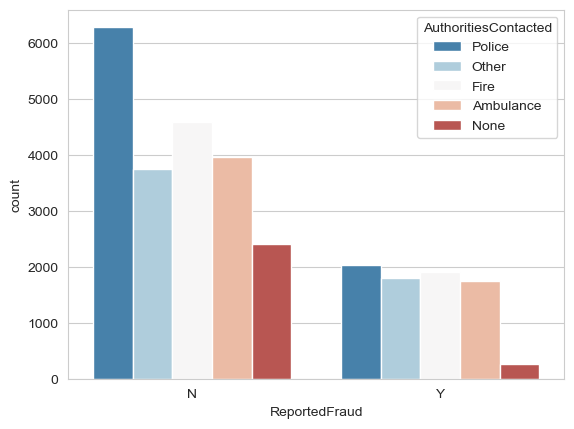

In [120]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='AuthoritiesContacted',data=train_data,palette='RdBu_r')

The police contaced cases seems to have fraudelent activities.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

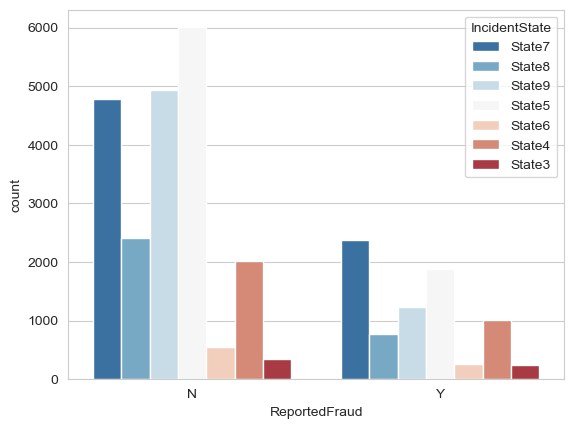

In [121]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='IncidentState',data=train_data,palette='RdBu_r')

State 7 has more fraudulent claims.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

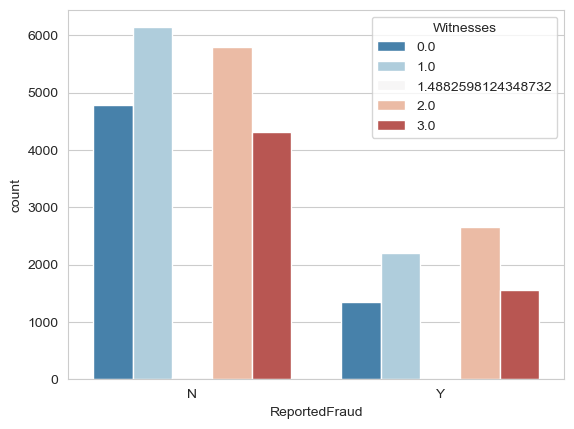

In [122]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='Witnesses',data=train_data,palette='RdBu_r')

Cases with 2 witnesses has more fraudulent claims.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

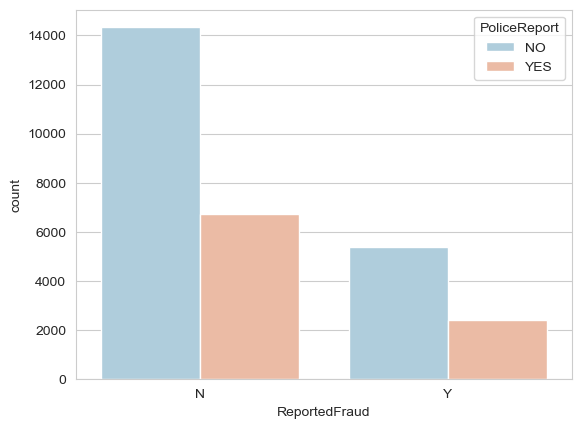

In [123]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='PoliceReport',data=train_data,palette='RdBu_r')

The cases where there are no report to police has connections with fradulent claim.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

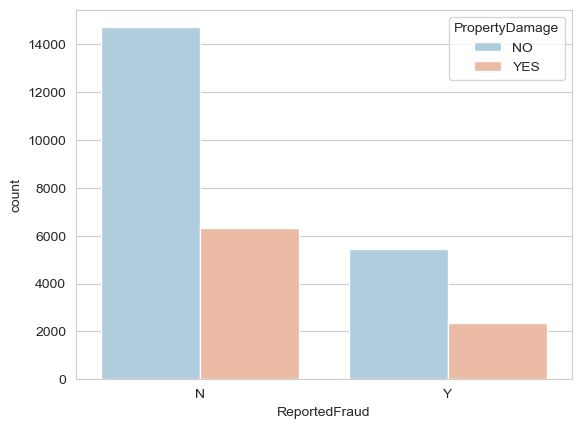

In [124]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='PropertyDamage',data=train_data,palette='RdBu_r')

The case with no property damage has fraud claims.

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

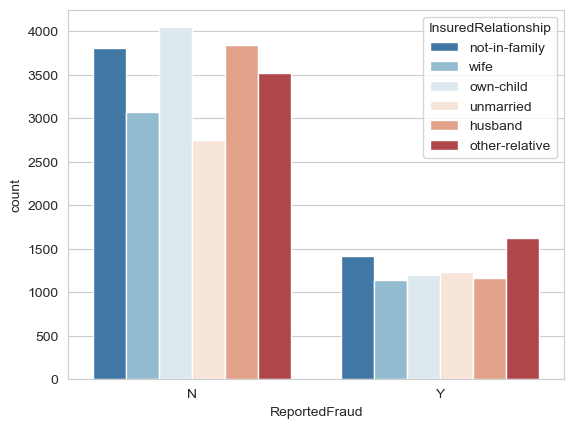

In [125]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='InsuredRelationship',data=train_data,palette='RdBu_r')

The people with other relatives has fraud claims

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

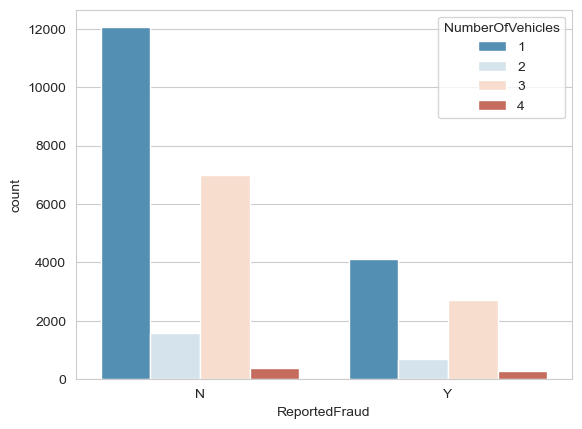

In [126]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='NumberOfVehicles',data=train_data,palette='RdBu_r')

The number of vehicles involved is one has fraud claim.

<AxesSubplot:xlabel='ReportedFraud', ylabel='AmountOfInjuryClaim'>

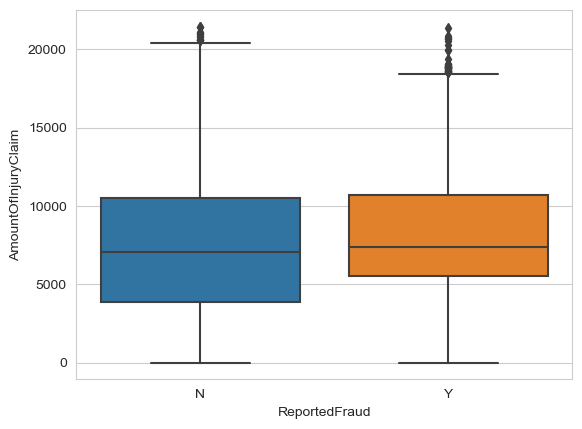

In [127]:
import seaborn as sns
sns.boxplot(x='ReportedFraud', y='AmountOfInjuryClaim', data=train_data)


<AxesSubplot:xlabel='ReportedFraud', ylabel='AmountOfTotalClaim'>

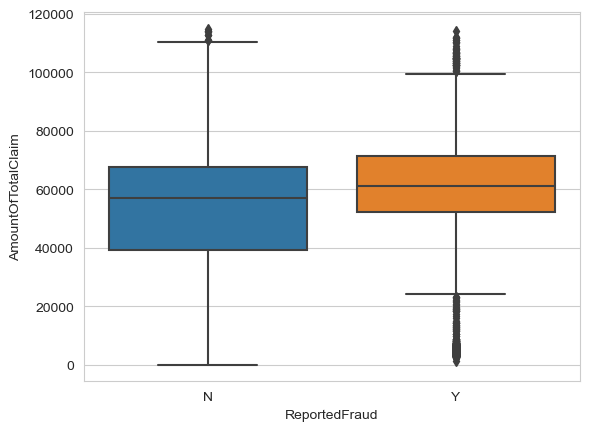

In [128]:
import seaborn as sns
sns.boxplot(x='ReportedFraud', y='AmountOfTotalClaim', data=train_data)


<AxesSubplot:xlabel='ReportedFraud', ylabel='AmountOfPropertyClaim'>

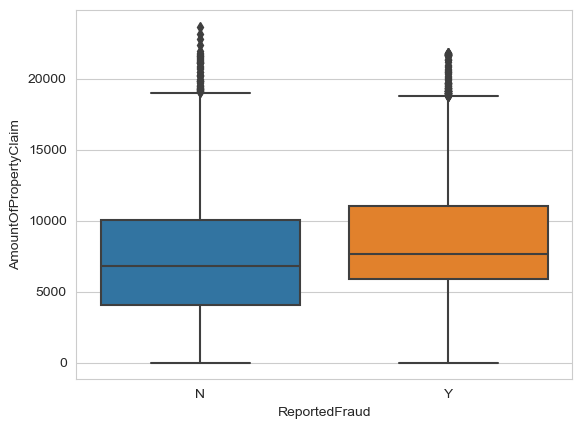

In [129]:
import seaborn as sns
sns.boxplot(x='ReportedFraud', y='AmountOfPropertyClaim', data=train_data)


<AxesSubplot:xlabel='ReportedFraud', ylabel='AmountOfVehicleDamage'>

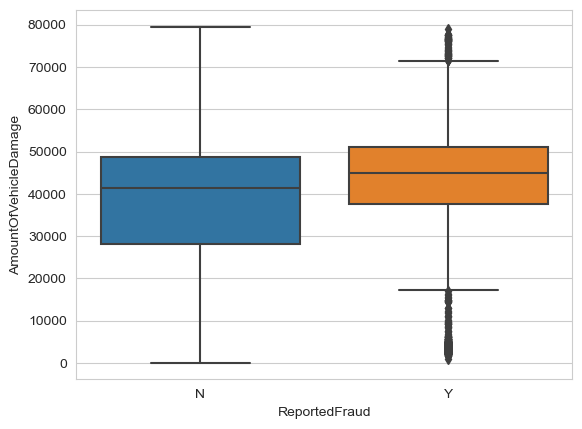

In [130]:
import seaborn as sns
sns.boxplot(x='ReportedFraud', y='AmountOfVehicleDamage', data=train_data)


By comparing the median values of AmountOfInjuryClaim for the reported fraud and not reported fraud groups, we can gain some insight into whether there is a relationship between these variables. The median value of AmountOfInjuryClaim is much higher for the reported fraud group than the not reported fraud group, it may indicate that fraudulent claims tend to involve higher amounts of injury claim.

#### Convert Categorical to Numerical values

In [131]:
numerical_cols = train_data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_data.select_dtypes(include='object').columns.tolist()
print("Numerical columns: ", numerical_cols)
print('')
print("Categorical columns: ", categorical_cols)

Numerical columns:  ['InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss', 'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsurancePolicyNumber', 'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'VehicleYOM']

Categorical columns:  ['CustomerID', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'Country', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'PoliceReport', 'DateOfPolicyCoverage', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleID', 'VehicleMake', 'VehicleModel', 'ReportedFraud']


In [132]:
#Type conversion using Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_cols = train_data.select_dtypes(include='object').columns.tolist()
train_data[categorical_cols] = train_data[categorical_cols].astype(str)
encoder = LabelEncoder()
for col in categorical_cols:
    train_data[col] = encoder.fit_transform(train_data[col])

In [133]:
train_data.dtypes

CustomerID                      int32
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                   int32
InsuredEducationLevel           int32
InsuredOccupation               int32
InsuredHobbies                  int32
CapitalGains                    int64
CapitalLoss                     int64
Country                         int32
DateOfIncident                  int32
TypeOfIncident                  int32
TypeOfCollission                int32
SeverityOfIncident              int32
AuthoritiesContacted            int32
IncidentState                   int32
IncidentCity                    int32
IncidentAddress                 int32
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                  int32
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                    int32
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfProp

#### Outlier Treatment by Z-score method

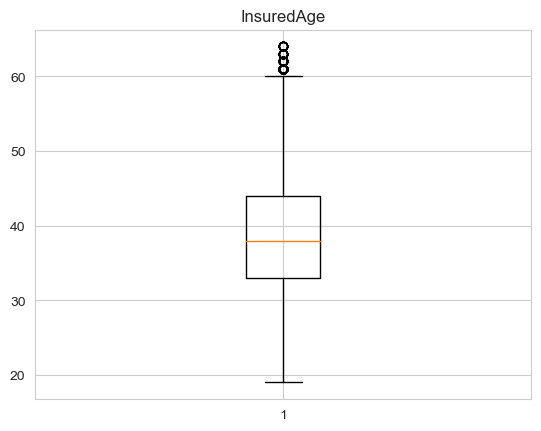

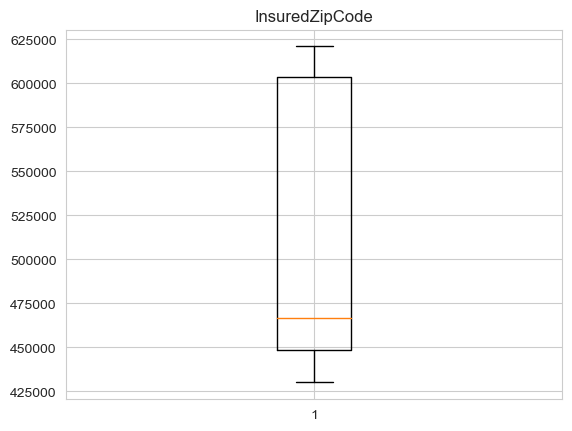

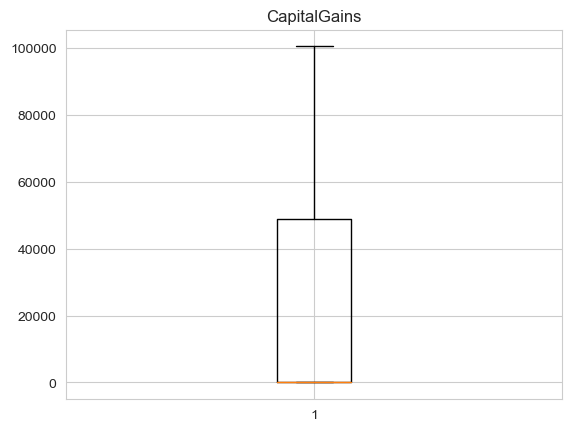

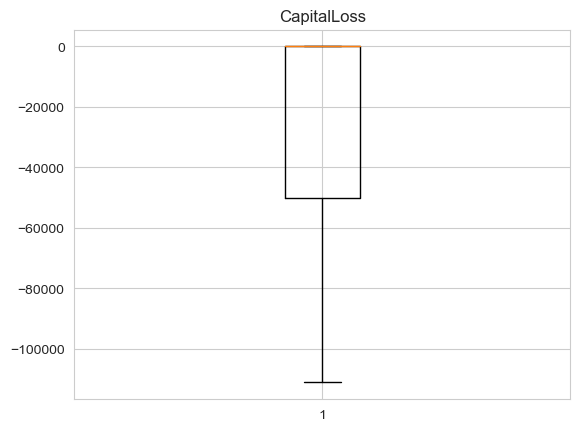

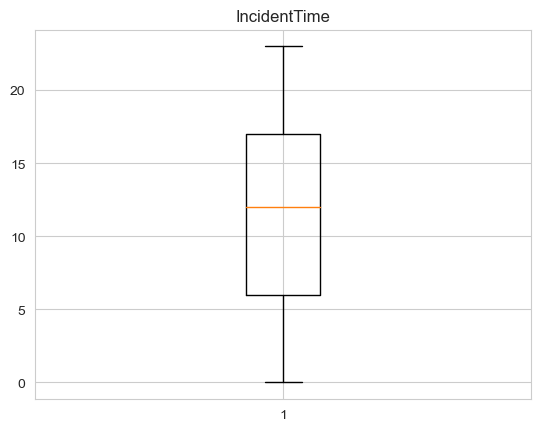

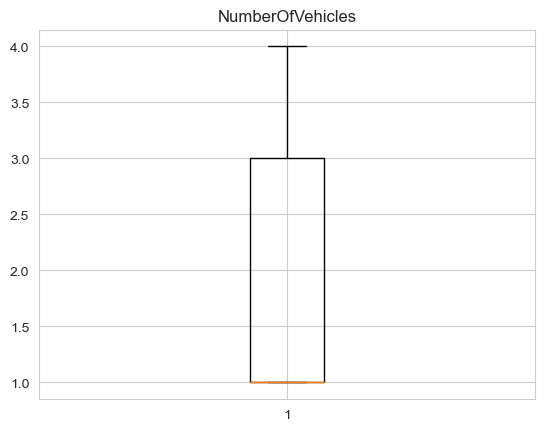

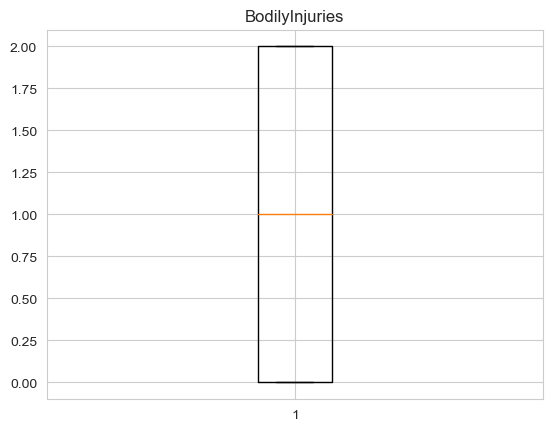

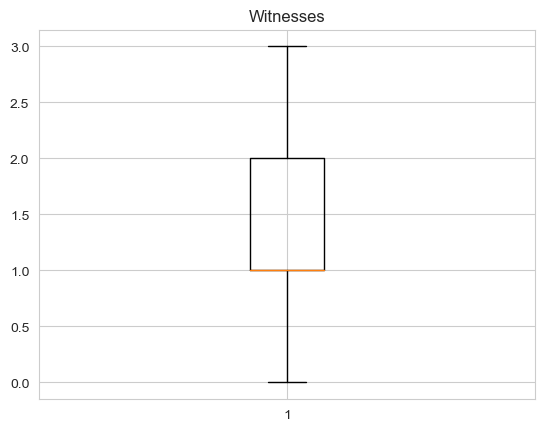

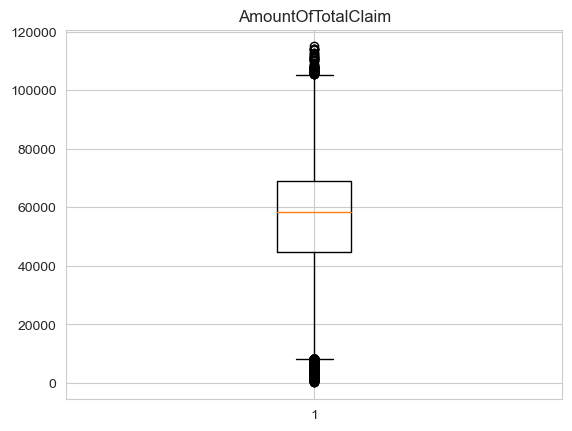

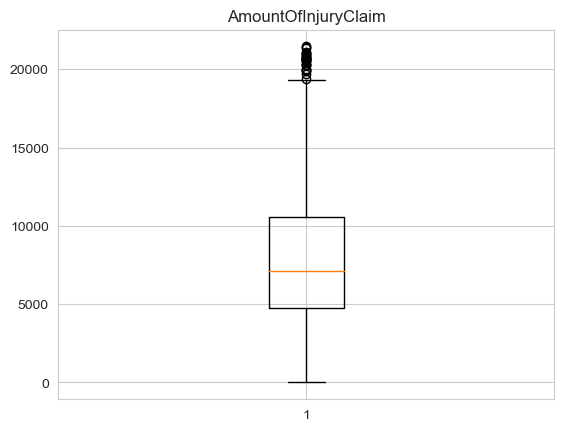

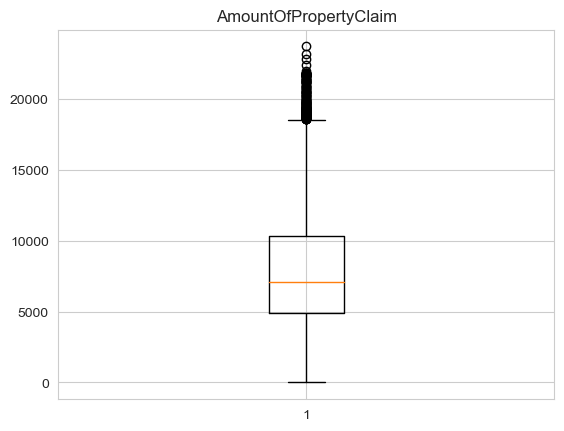

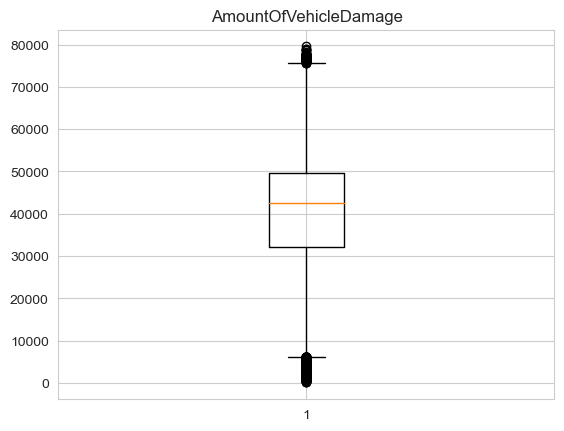

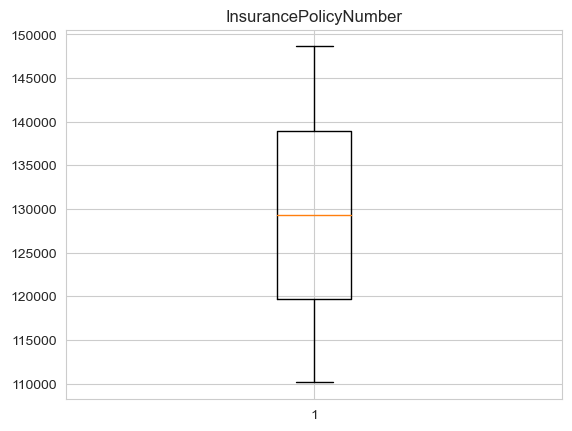

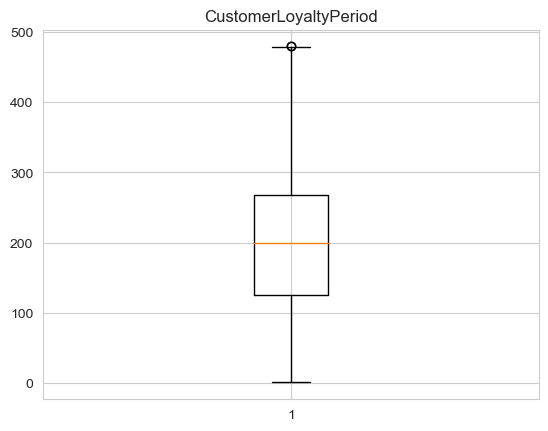

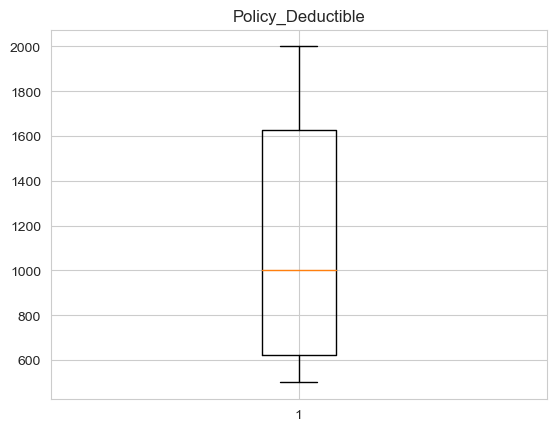

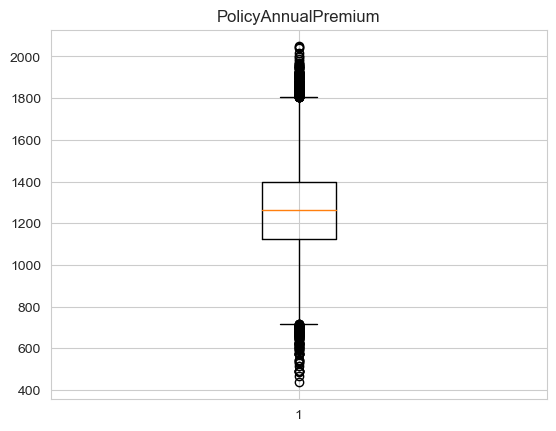

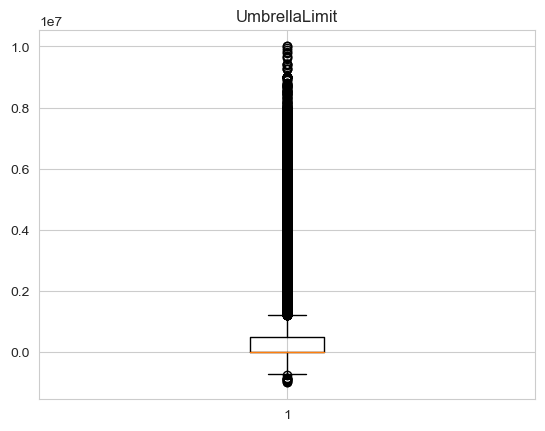

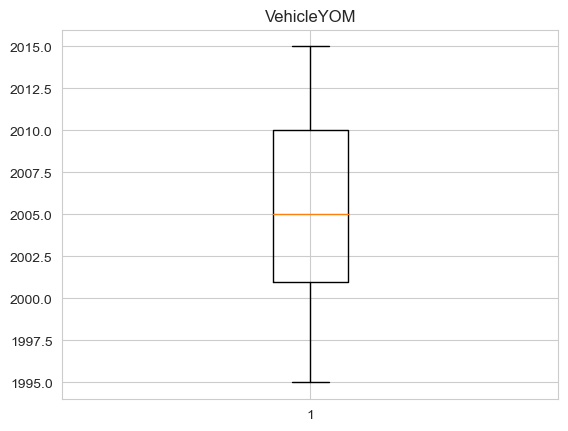

In [134]:
for col in numerical_cols:
    plt.boxplot(train_data[col])
    plt.title(col)
    plt.show()

In [135]:
for col in numerical_cols:
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")


Number of outliers in InsuredAge: 176
Number of outliers in InsuredZipCode: 0
Number of outliers in CapitalGains: 0
Number of outliers in CapitalLoss: 0
Number of outliers in IncidentTime: 0
Number of outliers in NumberOfVehicles: 0
Number of outliers in BodilyInjuries: 0
Number of outliers in Witnesses: 0
Number of outliers in AmountOfTotalClaim: 4967
Number of outliers in AmountOfInjuryClaim: 28
Number of outliers in AmountOfPropertyClaim: 156
Number of outliers in AmountOfVehicleDamage: 5009
Number of outliers in InsurancePolicyNumber: 0
Number of outliers in CustomerLoyaltyPeriod: 2
Number of outliers in Policy_Deductible: 0
Number of outliers in PolicyAnnualPremium: 306
Number of outliers in UmbrellaLimit: 6455
Number of outliers in VehicleYOM: 0


In [136]:
# Remove outliers
for col in numerical_cols:
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    train_df_cleaned = train_data[(train_data[col] >= lower_bound) & (train_data[col] <= upper_bound)]

# Save cleaned data to a new CSV file
train_df_cleaned.to_csv('cleaned_data.csv', index=False)

# Display number of rows before and after outlier treatment
print(f"Number of rows before outlier treatment: {len(train_data)}")
print(f"Number of rows after outlier treatment: {len(train_df_cleaned)}")


Number of rows before outlier treatment: 28836
Number of rows after outlier treatment: 28836


In [137]:
training_data = pd.read_csv("cleaned_data.csv")

# Test data

In [138]:
test_data = pd.merge(test_demographics, test_claim, on='CustomerID')
test_data = pd.merge(test_data, test_policy, on='CustomerID')
test_data = pd.merge(test_data, test_vehicle, on='CustomerID')
test_data = pd.merge(test_data, test, on='CustomerID')

In [139]:
#Save the new train data as test_data.csv
test_data.to_csv('test_data.csv', index=False)

In [140]:
test_data = pd.read_csv('test_data.csv')

In [141]:
#Displaying first five rows
test_data.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,...,State2,500/1000,2000,1006.00,0,own-child,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,...,State3,100/300,500,1279.17,0,unmarried,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India,...,State2,250/500,1000,1454.67,1235986,other-relative,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,...,State3,500/500,2000,1287.76,5873212,wife,Vehicle37114,Accura,TL,2009
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,...,State3,100/300,2000,1413.14,5000000,own-child,Vehicle16771,Dodge,RAM,2007


In [142]:
#Displaying last five rows
test_data.tail()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
8907,Cust9984,28,446435,MALE,Associate,tech-support,camping,0,-53700,India,...,State3,500/1000,673,1104.02,1959277,wife,Vehicle19062,Saab,95,2000
8908,Cust9986,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India,...,State2,250/500,574,961.46,0,husband,Vehicle18191,Saab,92x,2000
8909,Cust9990,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India,...,State2,100/300,1216,1560.49,0,wife,Vehicle11032,BMW,Civic,1998
8910,Cust9995,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India,...,State2,100/300,1950,1577.48,0,wife,Vehicle30412,Jeep,Grand Cherokee,2002
8911,Cust9998,38,450730,FEMALE,PhD,handlers-cleaners,video-games,51500,-74300,India,...,State2,500/1000,2000,928.75,3701890,husband,Vehicle2349,Suburu,E400,2007


In [143]:
#Checking info of merged test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  8912 non-null   object 
 1   InsuredAge                  8912 non-null   int64  
 2   InsuredZipCode              8912 non-null   int64  
 3   InsuredGender               8912 non-null   object 
 4   InsuredEducationLevel       8912 non-null   object 
 5   InsuredOccupation           8912 non-null   object 
 6   InsuredHobbies              8912 non-null   object 
 7   CapitalGains                8912 non-null   int64  
 8   CapitalLoss                 8912 non-null   int64  
 9   Country                     8912 non-null   object 
 10  DateOfIncident              8912 non-null   object 
 11  TypeOfIncident              8912 non-null   object 
 12  TypeOfCollission            8912 non-null   object 
 13  SeverityOfIncident          8912 

In [144]:
#Checking datatypes of merged test data
test_data.dtypes

CustomerID                     object
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
Country                        object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfProp

In [145]:
test_data.shape

(8912, 41)

In [146]:
test_data.isnull().sum()

CustomerID                    0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

Conversion from categorical to numerical is needed.

In [147]:
#Checking descriptive statistics of merged test data
test_data.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM
count,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8.912000e+03,8912.000000
mean,38.743492,501558.312949,23413.004937,-25365.888689,11.786131,1.801616,0.988330,1.494149,51099.184470,7214.076750,7114.529286,36761.520646,130481.939295,203.055206,1123.580790,1260.235059,9.318594e+05,2005.099417
std,7.914619,72051.904910,27821.325212,28032.959284,6.154688,0.972594,0.783827,1.045841,25642.926203,4447.763373,4367.824773,18381.523101,10879.022180,98.423250,553.139684,204.991332,1.919603e+06,5.312139
min,19.000000,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,110124.000000,0.000000,500.000000,433.330000,-8.836920e+05,1995.000000
25%,33.000000,447469.000000,0.000000,-50400.000000,6.000000,1.000000,0.000000,1.000000,42303.000000,4409.000000,4508.250000,30215.750000,121312.500000,127.000000,622.000000,1120.035000,0.000000e+00,2001.000000
50%,38.000000,466303.000000,0.000000,0.000000,12.000000,1.000000,1.000000,1.000000,57804.500000,7133.500000,6988.500000,41913.000000,130807.000000,199.000000,1000.000000,1264.615000,0.000000e+00,2005.000000
75%,44.000000,603527.000000,49900.000000,0.000000,17.000000,3.000000,2.000000,2.000000,68506.250000,10378.500000,10184.500000,49222.000000,139904.000000,265.000000,1691.250000,1398.722500,2.836810e+05,2010.000000
max,64.000000,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,112320.000000,20989.000000,23498.000000,77760.000000,148617.000000,478.000000,2000.000000,2033.540000,9.699227e+06,2015.000000


In [148]:
# Define a list of special missing value representations
special_missing_values = ["?", "MISSINGVAL", "NA", "-1", "-5", "MISSINGVALUE", "MISSEDDATA", "???"]

# Replace all instances of special missing values with NaN
train_data.replace(special_missing_values, np.nan, inplace=True)

# Count the number of missing values in each column
missing_values_count = train_data.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values_count / len(train_data)) * 100

# Create a new DataFrame to store the missing value information
missing_info = pd.DataFrame({
    "Total Missing": missing_values_count,
    "Percent Missing": percent_missing
})

print("Missing Value Information:")
print(missing_info)


Missing Value Information:
                            Total Missing  Percent Missing
CustomerID                              0              0.0
InsuredAge                              0              0.0
InsuredZipCode                          0              0.0
InsuredGender                           0              0.0
InsuredEducationLevel                   0              0.0
InsuredOccupation                       0              0.0
InsuredHobbies                          0              0.0
CapitalGains                            0              0.0
CapitalLoss                             0              0.0
Country                                 0              0.0
DateOfIncident                          0              0.0
TypeOfIncident                          0              0.0
TypeOfCollission                        0              0.0
SeverityOfIncident                      0              0.0
AuthoritiesContacted                    0              0.0
IncidentState                

In [149]:
# Define a list of special missing value representations
special_missing_values = ["?", "MISSINGVAL", "NA", "-1", "-5", "MISSINGVALUE", "MISSEDDATA", "???"]

# Replace all instances of special missing values with NaN
test_data.replace(special_missing_values, np.nan, inplace=True)

# Count the number of missing values in each column
missing_values_count = test_data.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values_count / len(test_data)) * 100

# Create a new DataFrame to store the missing value information
missing_info = pd.DataFrame({
    "Total Missing": missing_values_count,
    "Percent Missing": percent_missing
})

print("Missing Value Information:")
print(missing_info)


Missing Value Information:
                            Total Missing  Percent Missing
CustomerID                              0              0.0
InsuredAge                              0              0.0
InsuredZipCode                          0              0.0
InsuredGender                           0              0.0
InsuredEducationLevel                   0              0.0
InsuredOccupation                       0              0.0
InsuredHobbies                          0              0.0
CapitalGains                            0              0.0
CapitalLoss                             0              0.0
Country                                 0              0.0
DateOfIncident                          0              0.0
TypeOfIncident                          0              0.0
TypeOfCollission                        0              0.0
SeverityOfIncident                      0              0.0
AuthoritiesContacted                    0              0.0
IncidentState                

In [150]:
numerical_cols = test_data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = test_data.select_dtypes(include='object').columns.tolist()
print("Numerical columns: ", numerical_cols)
print('')
print("Categorical columns: ", categorical_cols)


Numerical columns:  ['InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss', 'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsurancePolicyNumber', 'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'VehicleYOM']

Categorical columns:  ['CustomerID', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'Country', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'PoliceReport', 'DateOfPolicyCoverage', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleID', 'VehicleMake', 'VehicleModel']


In [151]:
#Type conversion using Label Encoder

from sklearn.preprocessing import LabelEncoder
categorical_cols = test_data.select_dtypes(include='object').columns.tolist()
test_data[categorical_cols] = test_data[categorical_cols].astype(str)

encoder = LabelEncoder()
for col in categorical_cols:
    test_data[col] = encoder.fit_transform(test_data[col])

In [152]:
test_data.dtypes

CustomerID                      int32
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                   int32
InsuredEducationLevel           int32
InsuredOccupation               int32
InsuredHobbies                  int32
CapitalGains                    int64
CapitalLoss                     int64
Country                         int32
DateOfIncident                  int32
TypeOfIncident                  int32
TypeOfCollission                int32
SeverityOfIncident              int32
AuthoritiesContacted            int32
IncidentState                   int32
IncidentCity                    int32
IncidentAddress                 int32
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                  int32
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                    int32
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfProp

#### Outlier treatment by IQR

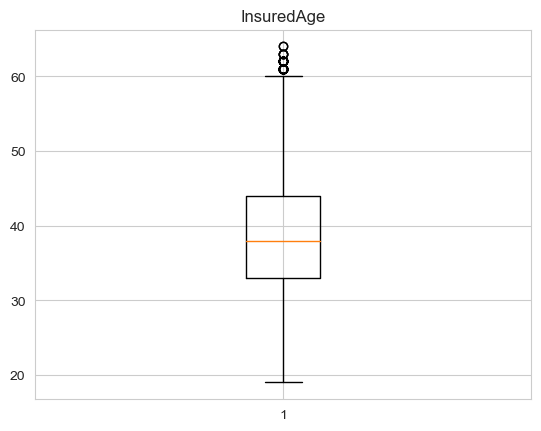

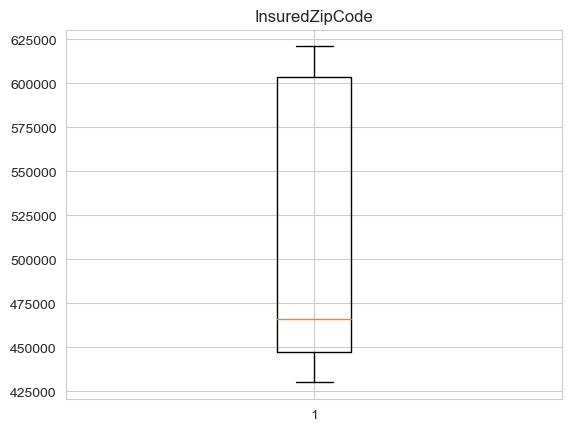

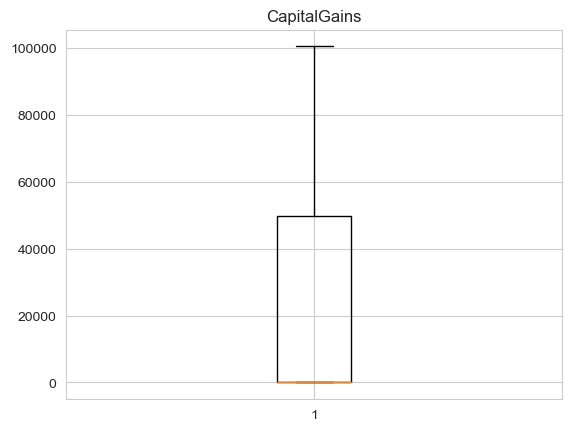

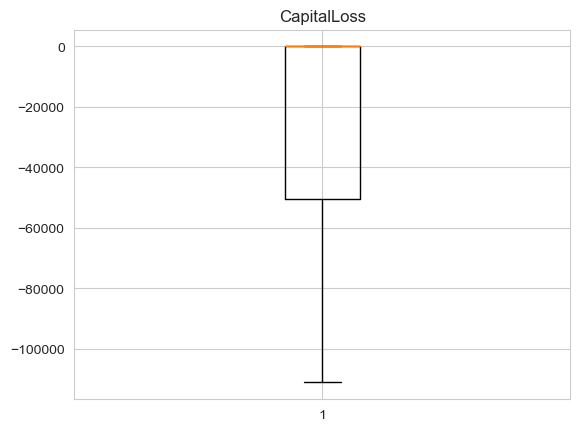

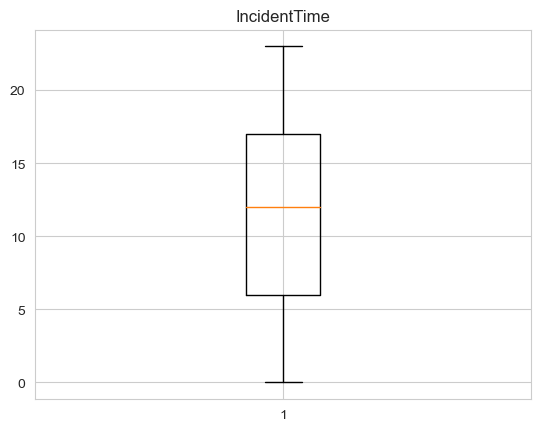

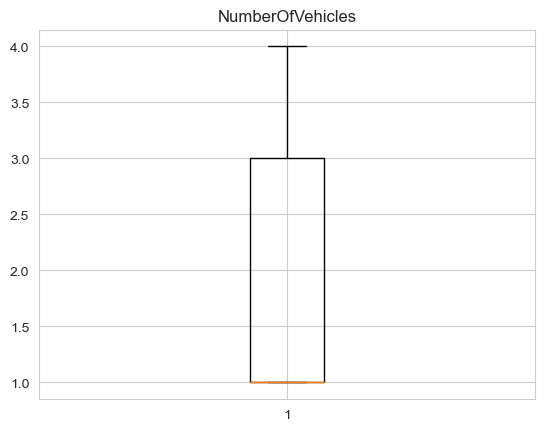

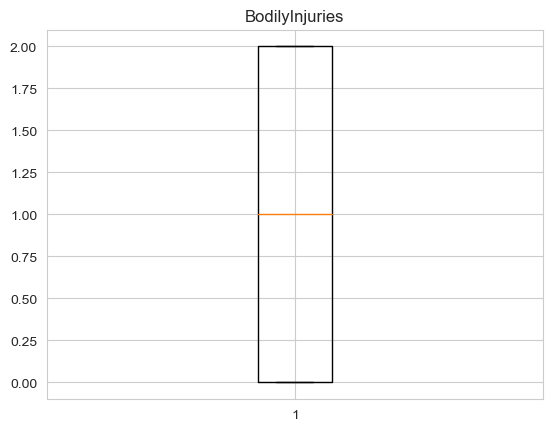

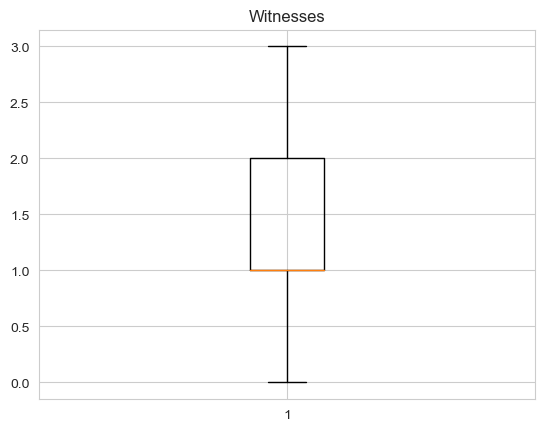

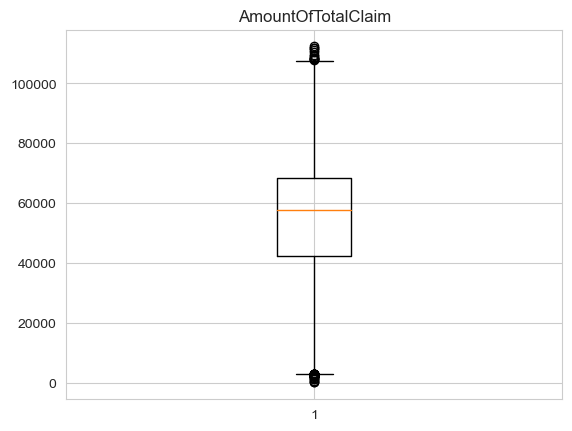

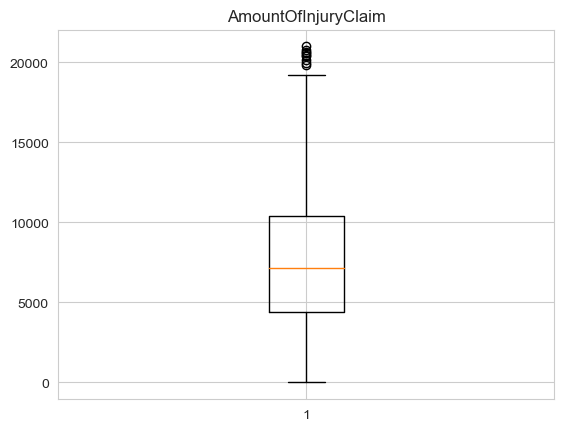

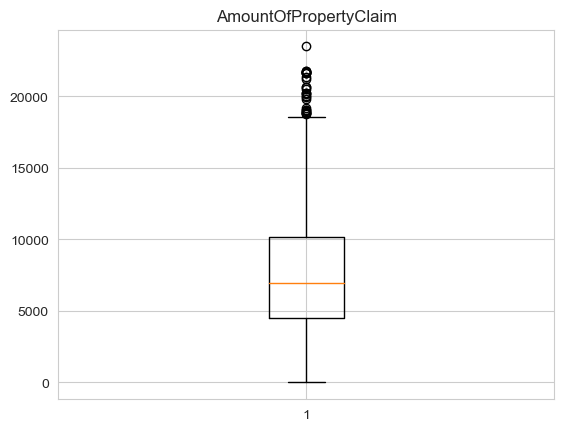

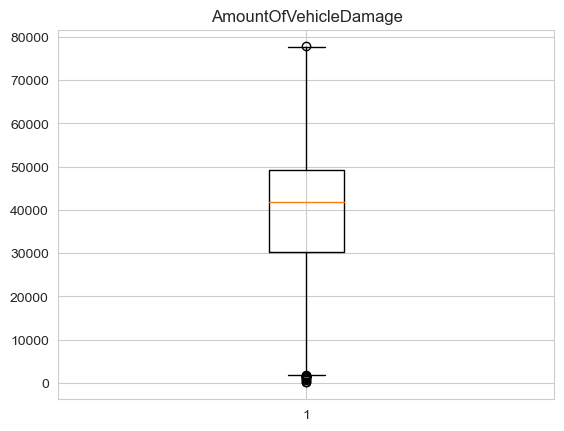

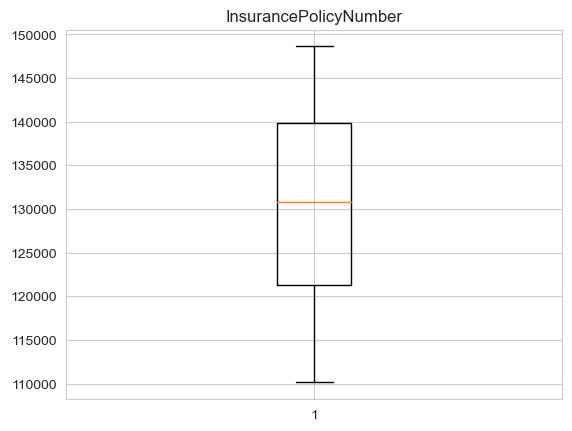

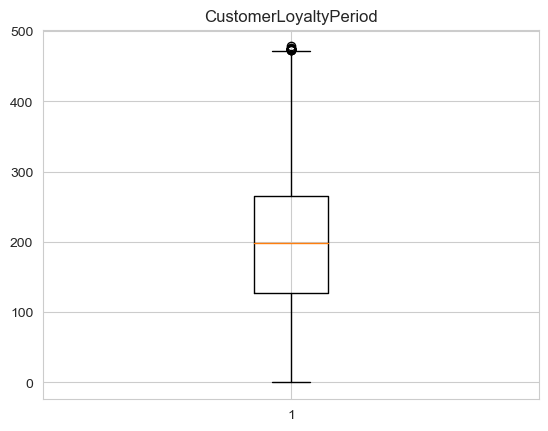

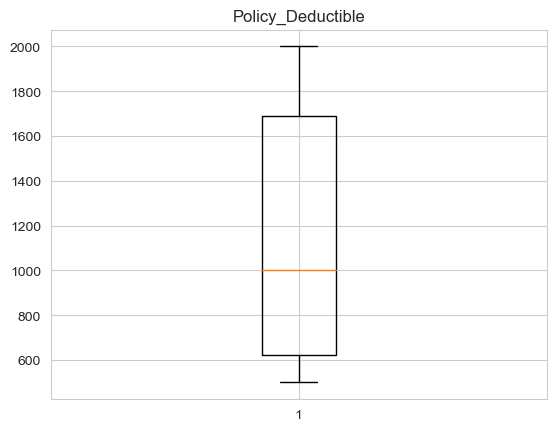

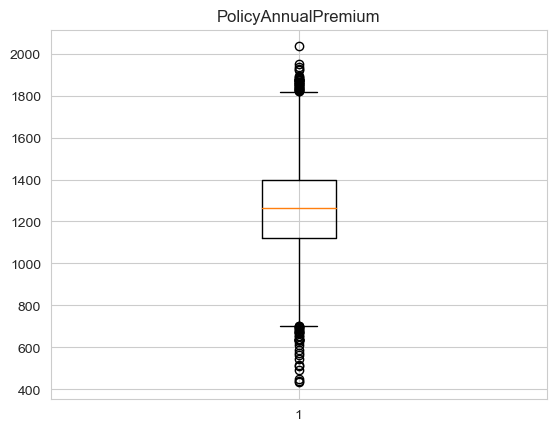

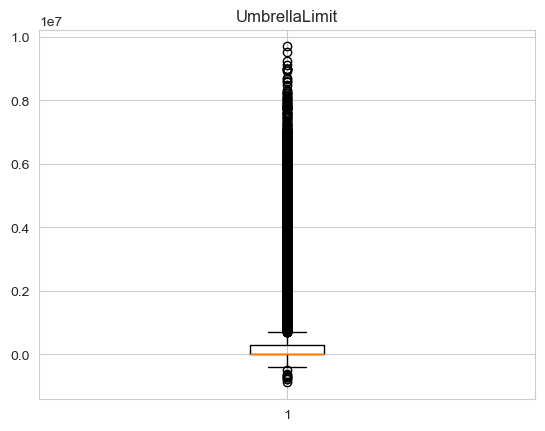

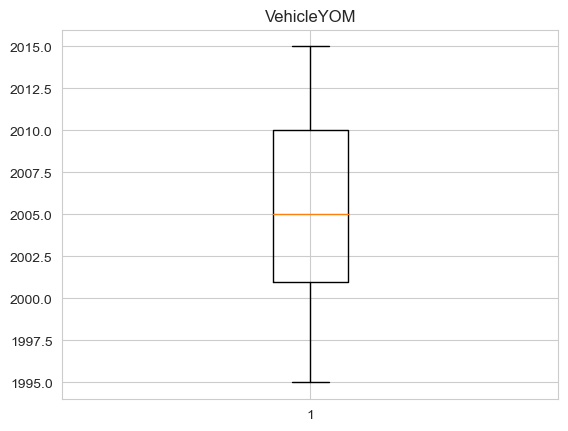

In [153]:
for col in numerical_cols:
    plt.boxplot(test_data[col])
    plt.title(col)
    plt.show()

In [154]:
for col in numerical_cols:
    q1 = test_data[col].quantile(0.25)
    q3 = test_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = test_data[(test_data[col] < lower_bound) | (test_data[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")


Number of outliers in InsuredAge: 56
Number of outliers in InsuredZipCode: 0
Number of outliers in CapitalGains: 0
Number of outliers in CapitalLoss: 0
Number of outliers in IncidentTime: 0
Number of outliers in NumberOfVehicles: 0
Number of outliers in BodilyInjuries: 0
Number of outliers in Witnesses: 0
Number of outliers in AmountOfTotalClaim: 66
Number of outliers in AmountOfInjuryClaim: 9
Number of outliers in AmountOfPropertyClaim: 29
Number of outliers in AmountOfVehicleDamage: 16
Number of outliers in InsurancePolicyNumber: 0
Number of outliers in CustomerLoyaltyPeriod: 12
Number of outliers in Policy_Deductible: 0
Number of outliers in PolicyAnnualPremium: 66
Number of outliers in UmbrellaLimit: 2092
Number of outliers in VehicleYOM: 0


In [155]:
# Remove outliers
for col in numerical_cols:
    q1 = test_data[col].quantile(0.25)
    q3 = test_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    test_df_cleaned = test_data[(test_data[col] >= lower_bound) & (test_data[col] <= upper_bound)]

# Save cleaned data to a new CSV file
test_df_cleaned.to_csv('cleaned_data_test.csv', index=False)

# Display number of rows before and after outlier treatment
print(f"Number of rows before outlier treatment: {len(test_data)}")
print(f"Number of rows after outlier treatment: {len(test_df_cleaned)}")


Number of rows before outlier treatment: 8912
Number of rows after outlier treatment: 8912


In [156]:
testing_data = pd.read_csv("cleaned_data_test.csv")

In [157]:
training_data

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,0,35,454776,1,3,1,12,56700,-48500,0,...,1,1000,1632.73,0,1,13692,1,5,2008,0
1,1,36,454776,1,3,12,6,70600,-48500,0,...,1,1000,1255.19,0,1,4572,1,5,2006,0
2,2,33,603260,1,3,1,14,66400,-63700,0,...,6,617,1373.38,0,5,25249,13,20,1999,0
3,3,36,474848,1,3,1,14,47900,-73400,0,...,6,722,1337.60,0,3,22267,13,20,2003,0
4,4,29,457942,0,2,3,7,0,-41500,0,...,1,500,1353.73,4279863,4,15080,12,8,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,28831,46,600561,1,5,10,17,0,0,0,...,6,655,1276.01,0,4,2673,11,19,2007,0
28832,28832,44,439304,1,5,0,7,0,-28800,0,...,1,1089,1273.38,0,4,7811,7,36,2003,0
28833,28833,53,460722,1,6,13,0,63100,-43800,0,...,5,787,1380.92,3448735,3,18983,11,21,2004,0
28834,28834,53,472634,1,0,13,16,67400,-43800,0,...,5,780,1389.29,3364301,1,183,11,15,2004,0


In [158]:
testing_data

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,0,27,471704,0,2,0,0,56400,-57000,0,...,1,6,2000,1006.00,0,3,6131,13,28,1995
1,1,40,455810,0,4,9,9,56700,-65600,0,...,2,1,500,1279.17,0,4,1712,9,34,2006
2,2,39,461919,1,3,7,12,30400,0,0,...,1,5,1000,1454.67,1235986,2,239,11,19,2010
3,3,38,600904,0,5,3,18,68500,0,0,...,2,8,2000,1287.76,5873212,5,6816,0,32,2009
4,4,29,430632,0,6,11,2,35100,0,0,...,2,1,2000,1413.14,5000000,3,1637,4,30,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,8907,28,446435,1,0,12,4,0,-53700,0,...,2,6,673,1104.02,1959277,5,2219,10,3,2000
8908,8908,30,438237,0,0,2,12,39600,-64300,0,...,1,5,574,961.46,0,0,2003,10,1,2000
8909,8909,44,450339,0,2,1,7,25000,0,0,...,1,1,1216,1560.49,0,5,238,2,10,1998
8910,8910,29,439304,1,6,13,10,75800,-28800,0,...,1,1,1950,1577.48,0,5,5097,7,17,2002


In [159]:
training_data.corr()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
CustomerID,1.000000,0.000194,-0.000006,0.006329,-0.001480,0.005749,-0.007268,-0.013483,-0.000443,NaN,...,-0.007173,-0.006564,-0.005670,0.011610,0.006889,-0.004179,-0.001714,-0.008896,-0.005845,0.218200
InsuredAge,0.000194,1.000000,0.042072,0.070623,0.024530,0.019681,-0.067853,-0.010798,0.017760,NaN,...,0.006781,0.050991,0.037588,-0.002061,0.057472,0.007442,0.010608,0.004910,-0.002640,0.009167
InsuredZipCode,-0.000006,0.042072,1.000000,0.003482,0.007470,-0.035368,0.005681,-0.013577,0.029327,NaN,...,0.008912,0.005297,0.032674,0.027233,-0.010324,0.010357,-0.001251,0.001248,-0.016233,0.019505
InsuredGender,0.006329,0.070623,0.003482,1.000000,-0.000254,-0.018260,-0.015466,-0.008038,-0.013706,NaN,...,0.022402,-0.001852,0.044578,0.022885,-0.001753,-0.006649,0.011673,0.003080,-0.026965,0.025812
InsuredEducationLevel,-0.001480,0.024530,0.007470,-0.000254,1.000000,-0.003515,0.023546,0.022144,0.015929,NaN,...,0.010687,0.009126,0.012885,-0.031582,0.004192,-0.010712,0.030573,0.014472,0.037932,0.011536
InsuredOccupation,0.005749,0.019681,-0.035368,-0.018260,-0.003515,1.000000,-0.000441,0.004100,-0.000213,NaN,...,0.016739,-0.032371,0.049397,0.018830,-0.016880,-0.004726,0.024444,0.010669,-0.020138,0.007339
InsuredHobbies,-0.007268,-0.067853,0.005681,-0.015466,0.023546,-0.000441,1.000000,0.038799,-0.017113,NaN,...,0.017562,0.003889,-0.022850,-0.038517,-0.061039,-0.001945,-0.005232,0.019747,-0.011847,-0.032742
CapitalGains,-0.013483,-0.010798,-0.013577,-0.008038,0.022144,0.004100,0.038799,1.000000,-0.050029,NaN,...,0.002078,0.019947,-0.009166,-0.044781,-0.011137,-0.002329,0.018149,0.027368,0.027880,-0.001372
CapitalLoss,-0.000443,0.017760,0.029327,-0.013706,0.015929,-0.000213,-0.017113,-0.050029,1.000000,NaN,...,-0.041106,-0.035179,0.012253,-0.025335,-0.034298,-0.006963,-0.041789,-0.024114,-0.064341,-0.014062
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
testing_data.corr()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,1.000000,0.004816,0.014584,0.010742,-0.002644,-0.004731,0.007230,-0.036967,0.031986,NaN,...,0.004449,-0.001437,-0.004401,0.003125,0.012486,-0.014194,-0.004545,0.008242,-0.007777,-0.019175
InsuredAge,0.004816,1.000000,0.048294,0.058312,0.021577,0.018753,-0.056770,-0.017408,0.021271,NaN,...,-0.018777,-0.005154,0.055350,0.029704,0.010422,0.046203,-0.002745,0.009448,0.006159,0.021616
InsuredZipCode,0.014584,0.048294,1.000000,-0.010864,0.022065,-0.036172,0.033573,-0.013277,0.033845,NaN,...,0.013360,0.005792,-0.001679,0.047212,0.027017,-0.023233,-0.007978,-0.011430,0.031107,-0.036273
InsuredGender,0.010742,0.058312,-0.010864,1.000000,-0.001313,-0.013535,-0.006642,-0.010883,-0.015835,NaN,...,-0.009917,0.020278,0.000328,0.032961,-0.000842,-0.016030,-0.005447,0.014239,-0.004814,-0.057428
InsuredEducationLevel,-0.002644,0.021577,0.022065,-0.001313,1.000000,0.003708,0.000657,0.032647,0.024985,NaN,...,-0.028474,0.005563,0.014913,-0.010616,-0.039812,0.018664,0.005195,0.018805,0.019611,0.046614
InsuredOccupation,-0.004731,0.018753,-0.036172,-0.013535,0.003708,1.000000,-0.000703,0.015960,-0.022693,NaN,...,0.001626,0.007395,-0.022123,0.033785,0.017351,0.005480,-0.004109,0.039679,0.008653,-0.014786
InsuredHobbies,0.007230,-0.056770,0.033573,-0.006642,0.000657,-0.000703,1.000000,0.036826,-0.013857,NaN,...,-0.016971,0.014502,0.015806,-0.026978,-0.025605,-0.061653,-0.004166,0.025712,0.029765,-0.005210
CapitalGains,-0.036967,-0.017408,-0.013277,-0.010883,0.032647,0.015960,0.036826,1.000000,-0.066684,NaN,...,0.039854,0.007269,0.017105,-0.006957,-0.031572,0.006860,-0.003000,0.046703,0.045043,0.028982
CapitalLoss,0.031986,0.021271,0.033845,-0.015835,0.024985,-0.022693,-0.013857,-0.066684,1.000000,NaN,...,-0.016658,-0.047141,-0.039908,-0.024070,0.012922,-0.023285,-0.003433,-0.064933,-0.024907,-0.064019
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
testing_data.shape

(8912, 41)

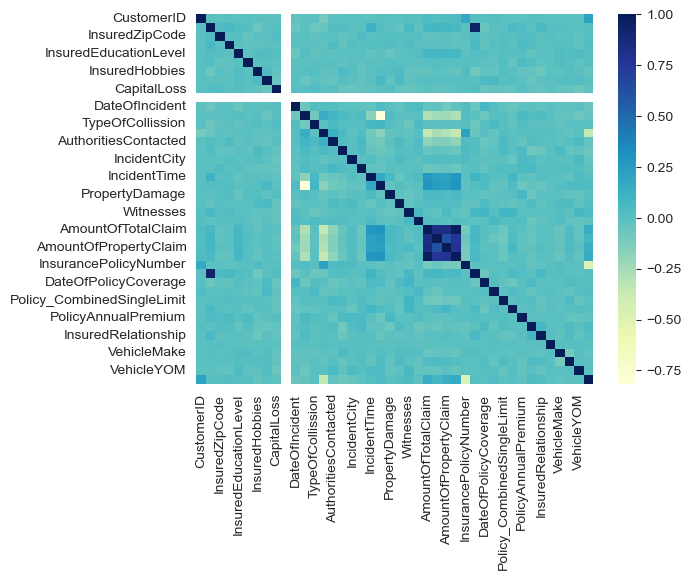

In [161]:
corr = training_data.corr()

sns.heatmap(corr, cmap="YlGnBu")
plt.show()

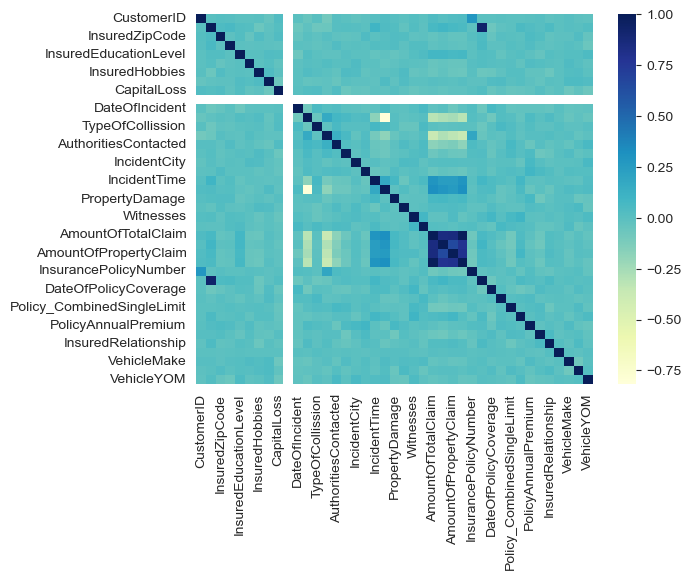

In [162]:
corr = testing_data.corr()

sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [163]:
X = training_data.drop('ReportedFraud', axis = 1)
y = training_data['ReportedFraud']

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_scaled_train = scaler.fit_transform(X)

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_train, y, test_size=0.30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Tes set:', X_test.shape,  y_test.shape)

Train set: (20185, 41) (20185,)
Tes set: (8651, 41) (8651,)


#### Get top 20 features using Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier,  export_text
clf = DecisionTreeClassifier(random_state=42)

#Fit the decision tree classifier
clf.fit(X_train, y_train)

#Get top 20 features:The feature importances are calculated based on the 
#Gini impurity index in scikit-learn's decision tree classifier
importances = clf.feature_importances_

#Get the indices that would sort the importances array in descending order
indices = np.argsort(importances)[::-1]

#Get the top 20 features
top_features = list(X_train.columns[indices][:20])
print(top_features)



['InsurancePolicyNumber', 'SeverityOfIncident', 'CustomerID', 'InsuredHobbies', 'PolicyAnnualPremium', 'VehicleID', 'DateOfIncident', 'AmountOfInjuryClaim', 'AmountOfVehicleDamage', 'DateOfPolicyCoverage', 'AmountOfPropertyClaim', 'InsuredZipCode', 'InsuredAge', 'IncidentTime', 'IncidentAddress', 'VehicleModel', 'VehicleYOM', 'VehicleMake', 'AmountOfTotalClaim', 'CustomerLoyaltyPeriod']


### Model Building

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

#### Logistic Regression

In [168]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
print("Logistic Regression:")
print("Train F1 score:", f1_score(y_train, y_pred_train_lr))
print("Test F1 score:", f1_score(y_test, y_pred_test_lr)) 


Logistic Regression:
Train F1 score: 0.5627755859828266
Test F1 score: 0.5690928270042194


#### Decision Tree

In [169]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)
print("Decision Tree:")
print("Train F1 score:", f1_score(y_train, y_pred_train_dt))
print("Test F1 score:", f1_score(y_test, y_pred_test_dt))

Decision Tree:
Train F1 score: 1.0
Test F1 score: 0.772244217545322


#### Random Forest

In [170]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)
print("Random Forest:")
print("Train F1 score:", f1_score(y_train, y_pred_train_rf))
print("Test F1 score:", f1_score(y_test, y_pred_test_rf))

Random Forest:
Train F1 score: 0.9999074673822521
Test F1 score: 0.8656581621133439


####  K-Nearest Neighbors

In [171]:
# Train and evaluate k-nearest neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)
print("K-Nearest Neighbors:")
print("Train F1 score:", f1_score(y_train, y_pred_train_knn))
print("Test F1 score:", f1_score(y_test, y_pred_test_knn))



K-Nearest Neighbors:
Train F1 score: 0.7109034267912773
Test F1 score: 0.6096003783400332


#### Naive Bayes

In [172]:
# Train and evaluate Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)
print("Naive Bayes:")
print("Train F1 score:", f1_score(y_train, y_pred_train_nb))
print("Test F1 score:", f1_score(y_test, y_pred_test_nb))


Naive Bayes:
Train F1 score: 0.6199233716475095
Test F1 score: 0.6283607979184735


#### Comparing F1 scores

In [173]:
# Create a dictionary to store the F1 scores for each model
f1_scores = {
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes'],
    'Train F1 Score': [f1_score(y_train, y_pred_train_dt), f1_score(y_train, y_pred_train_rf), f1_score(y_train, y_pred_train_lr), f1_score(y_train, y_pred_train_knn), f1_score(y_train, y_pred_train_nb)],
    'Test F1 Score': [f1_score(y_test, y_pred_test_dt), f1_score(y_test, y_pred_test_rf), f1_score(y_test, y_pred_test_lr), f1_score(y_test, y_pred_test_knn), f1_score(y_test, y_pred_test_nb)]
}

# Convert the dictionary to a pandas DataFrame and display it
df = pd.DataFrame(f1_scores)
df = df.sort_values('Test F1 Score', ascending=False)
print(df)


                 Model  Train F1 Score  Test F1 Score
1        Random Forest        0.999907       0.865658
0        Decision Tree        1.000000       0.772244
4          Naive Bayes        0.619923       0.628361
3  K-Nearest Neighbors        0.710903       0.609600
2  Logistic Regression        0.562776       0.569093


### Hyperparameter Tuning

In [184]:
from sklearn.preprocessing import StandardScaler

X2 = testing_data

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)
X2_scaled=pd.DataFrame(X2_scaled)

#### Decision Tree

In [219]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Run the grid search using 5-fold cross-validation
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
print('Best Parameters:', grid_search_dt.best_params_)

# Train a new model using the best hyperparameters on the entire training set
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set using F1 score
y_pred_dt_train = best_dt.predict(X_train)
y_pred_dt_test = best_dt.predict(X_test)
print("Decision Tree Hyper-parameter Tuning:")
print("Train F1 score:", f1_score(y_train, y_pred_dt_train))
print("Test F1 score:", f1_score(y_test, y_pred_dt_test))
y_pred_dt_test

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Hyper-parameter Tuning:
Train F1 score: 0.8566104354648882
Test F1 score: 0.839177185600748


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [222]:
import pickle

# Create a pickle file for the model
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(grid_search_dt, f)

# Load the KNN model from the pickle file
with open('dt_model.pkl', 'rb') as f:
    dt_model = pickle.load(f)

# Make predictions on the test data using the KNN model
pred_dt = dt_model.predict(X2_scaled)
print(f"Prediction from DT model: {pred_dt}")

# Create a DataFrame with CustomerID and predicted labels
results_df = pd.DataFrame({'CustomerID': testing_data['CustomerID'], 'ReportedFraudPredictions': pred_dt})

# Save the results to a CSV file
results_file_name = 'Predictions_DT.csv'
results_df.to_csv(results_file_name, index=False)


Prediction from DT model: [1 1 1 ... 1 0 1]


#### K-Nearest Neighbour

In [176]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Perform grid search using F1 score as the scoring metric
grid_search_knn = GridSearchCV(knn, param_grid, scoring='f1_macro', cv=5)
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_knn.best_params_
print("Best Hyperparameters:", best_params)

# Initialize KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)

# Train the classifier with the best hyperparameters
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test)

# Calculate the F1 score on the test set
f1 = f1_score(y_test, y_pred_knn, average='macro')
print("F1 Score:", f1)


Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
F1 Score: 0.7408112618031177


#### Logistic Regression

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression classifier
classifier = LogisticRegression()

# Define the hyperparameters to tune
hyperparameters = {
    'C': [0.1, 0.5, 1.0, 2.0],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],    # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
    'solver': ['liblinear']     # Optimization algorithm
}

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(classifier, hyperparameters, scoring='f1_macro', cv=5)
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search_lr.best_params_)

# Train the classifier with the best hyperparameters
best_classifier = LogisticRegression(C=grid_search_lr.best_params_['C'],
                                     penalty=grid_search_lr.best_params_['penalty'],
                                     solver=grid_search_lr.best_params_['solver'])
best_classifier.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred_lr = best_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred_lr, average='macro')
print("F1 score:", f1)


Best hyperparameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
F1 score: 0.7711008959979818


#### Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier object
rfc = RandomForestClassifier()

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 4, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Use grid search to find the best hyperparameters based on F1 score
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search_rf.best_params_)

# Evaluate the model performance on the test set using the best hyperparameters
best_rfc = grid_search_rf.best_estimator_
y_pred_rfc = best_rfc.predict(X_test)
f1 = f1_score(y_test, y_pred_rfc, average='macro')
print("Test set F1 score:", f1)

Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Test set F1 score: 0.9094095342683091


In [180]:
import pickle
grid_search_rf.fit(X_train, y_train)

# Create a pickle file for the model
with open('rfc_model.pkl', 'wb') as f:
    pickle.dump(grid_search_rf, f)

# Load the KNN model from the pickle file
with open('rfc_model.pkl', 'rb') as f:
    rfc_model = pickle.load(f)

# Make predictions on the test data using the DTC model
pred_rfc = rfc_model.predict(X_test)
print(f"Prediction from RFC model: {pred_rfc}")

# Create a DataFrame with CustomerID and predicted labels
results_rfc = pd.DataFrame({'CustomerID': testing_data['CustomerID'], 'ReportedFraudPredictions': pred_rfc})

# Save the results to a CSV file
results_file_name = 'Predictions_RFC_Model.csv'
results_rfc.to_csv(results_file_name, index=False)

Prediction from RFC model: [0 1 1 ... 1 1 0]


In [225]:
code1 = ["0.8391771856"]
df1 = pd.DataFrame({'Decision Tree ': code1})

code2 = [ "0.740811261803"]
df2 = pd.DataFrame({'KNN': code2})

code3 = [ "0.77110089"] 
df3 = pd.DataFrame({'Logistic regression': code3}) 

code4 = [ "0.909409534"] 
df4 = pd.DataFrame({' Random Forest': code4}) 

result = [ 'F1 Score']
df5 = pd.DataFrame({'Column': result})


# display the results in a table
df = pd.concat([df5, df1, df2, df3,df4], axis=1)

print(" ")
print(df)

 
     Column Decision Tree              KNN Logistic regression  Random Forest
0  F1 Score   0.8391771856  0.740811261803          0.77110089    0.909409534
